# <font color = blue> Credit Card Fraud Detection </font>

Objective of the Project: To predict fraudulent credit card transactions with the help of Machine learning models.

## <font color = blue> PART-1: Exploratory Data Analysis </font>

In [1]:
# Import all the libraries for Data Analysis, Visualisation, Random Forest & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams, cycler

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE

# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score
                        
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#Importing the PCA module
from sklearn.decomposition import PCA

# import SMOTE & ADASYN modules from imblearn library 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import PowerTransformer

Using TensorFlow backend.


In [2]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows", 500)

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the CSV data file provided for data analysis
df = pd.read_csv('creditcard.csv')

In [4]:
#Get the shape (row and column count of the data)
df.shape

(284807, 31)

In [5]:
#Read the data samples
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#Get the data description for all numeric fields
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Get the columns wise info - Datatypes and missing values
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

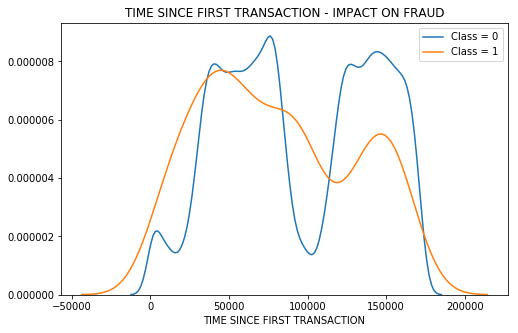

In [8]:
# Plot the KDE distribution of CLASS '0' and '1' against TIME
plt.figure(figsize = (8, 5))
sns.kdeplot(df.loc[df['Class'] == 0, 'Time'] , label='Class = 0')
sns.kdeplot(df.loc[df['Class'] == 1, 'Time'] , label='Class = 1')
plt.title('TIME SINCE FIRST TRANSACTION - IMPACT ON FRAUD');
plt.xlabel('TIME SINCE FIRST TRANSACTION')
plt.show()

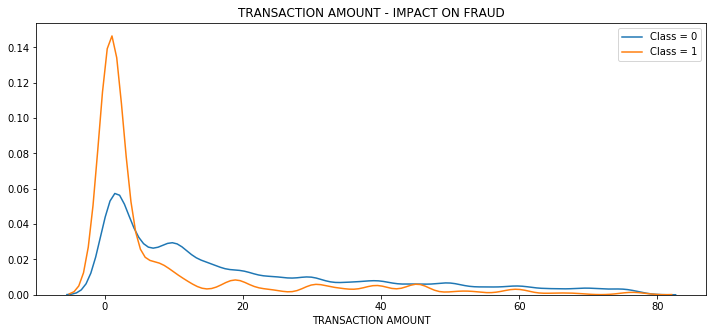

In [9]:
# Plot the KDE distribution of CLASS '0' and '1' against TRANSACTION AMOUNT
plt.figure(figsize = (12, 5))
sns.kdeplot(df.loc[(df['Class'] == 0) & (df['Amount'] <= df['Amount'].quantile(0.75)), 'Amount'] , label='Class = 0')
sns.kdeplot(df.loc[(df['Class'] == 1) & (df['Amount'] <= df['Amount'].quantile(0.75)), 'Amount'] , label='Class = 1')
plt.title('TRANSACTION AMOUNT - IMPACT ON FRAUD');
plt.xlabel('TRANSACTION AMOUNT')
#plt.xticks(np.arange(min(df['Amount']), (max(df['Amount'])/2)+1, 1000.0))
plt.show()

In [10]:
# Check the columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

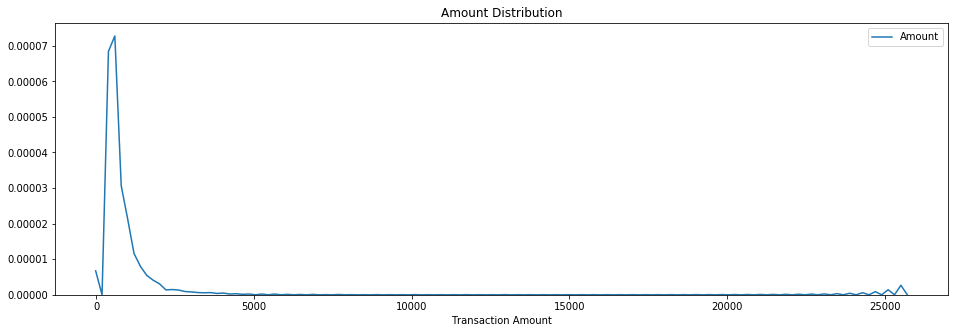

In [11]:
# Check the amount distribution
plt.figure(figsize=(16,5))

plt.title('Amount Distribution')
sns.kdeplot(df['Amount'])

plt.xlabel('Transaction Amount')
plt.show()

In [12]:
# Compute the Class counts acorss the dataset

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

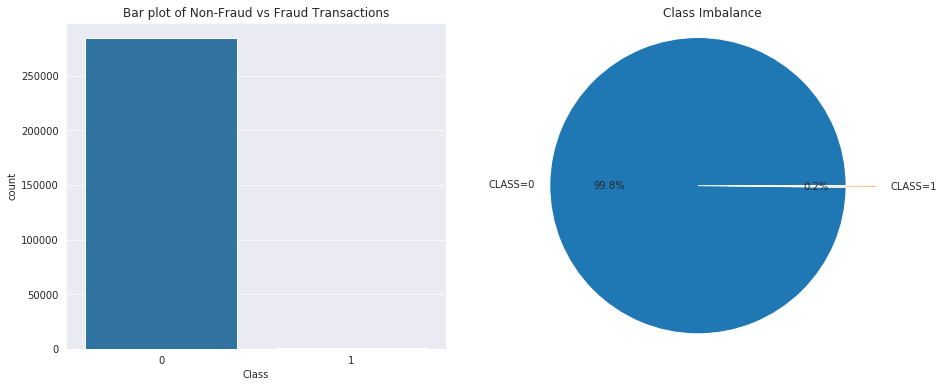

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Bar plot of Non-Fraud vs Fraud Transactions')
sns.countplot(x= 'Class', data = df)

pie_labels = ['CLASS=0', 'CLASS=1']
pie_sizes =  normal_share, fraud_share
explode = (0.1, 0.1)  # only "explode" the 2nd slice

plt.subplot(1, 2, 2)
plt.pie(pie_sizes, labels=pie_labels, explode = explode, autopct='%1.1f%%',shadow=False)
plt.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.
plt.title('Class Imbalance')
plt.show()

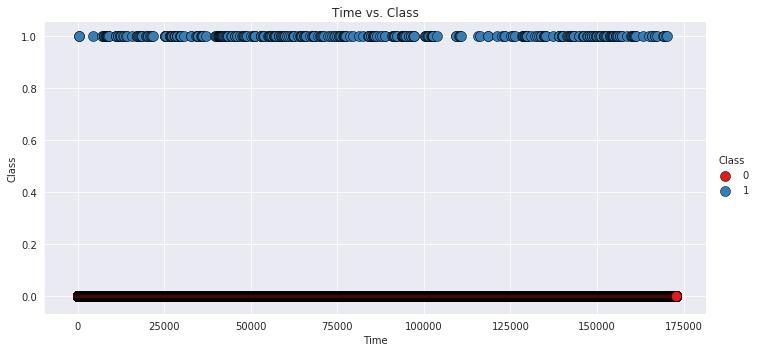

In [14]:
# Create a scatter plot to observe the distribution of classes with time
#Define the dictionary for keywords to be used in plotting
kws = dict(s=100, linewidth=0.5, edgecolor="k")

#Create a seaborn FacetGrid with Dataframe and plot State Category as hue
g = sns.FacetGrid(df, hue="Class", palette="Set1", height=5, aspect=2)

#Label the plot
plt.title("Time vs. Class")

#Generate a scatter plot with Time & Class
g = (g.map(plt.scatter, "Time", "Class", **kws).add_legend())

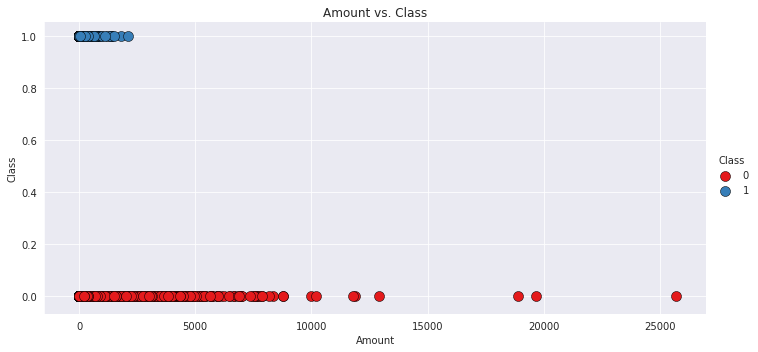

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount

#Create a seaborn FacetGrid with Dataframe and plot State Category as hue
h = sns.FacetGrid(df, hue="Class", palette="Set1", height=5, aspect=2)

#Label the plot
plt.title("Amount vs. Class")

#Generate a scatter plot with Time & Class
h = (h.map(plt.scatter, "Amount", "Class", **kws).add_legend())

In [16]:
# Drop unnecessary columns and assign into new dataframe
df_new=df.copy()
df_new.drop('Time',axis=1,inplace=True)

In [17]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## <font color = blue> PART-2: Train-Test Data Split </font>

In [18]:
y= df_new['Class'] #class variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [19]:
# Prepare X and Y list
X=df_new.drop(['Class'], axis =1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [20]:
# Split 80:20 into Training and Test Data

X_train, X_test, y_train, y_test  = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42,stratify=y)

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


In [22]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


## <font color =blue> PART-3: Check Skew distribution and reduce skewness using powerTransform </font>

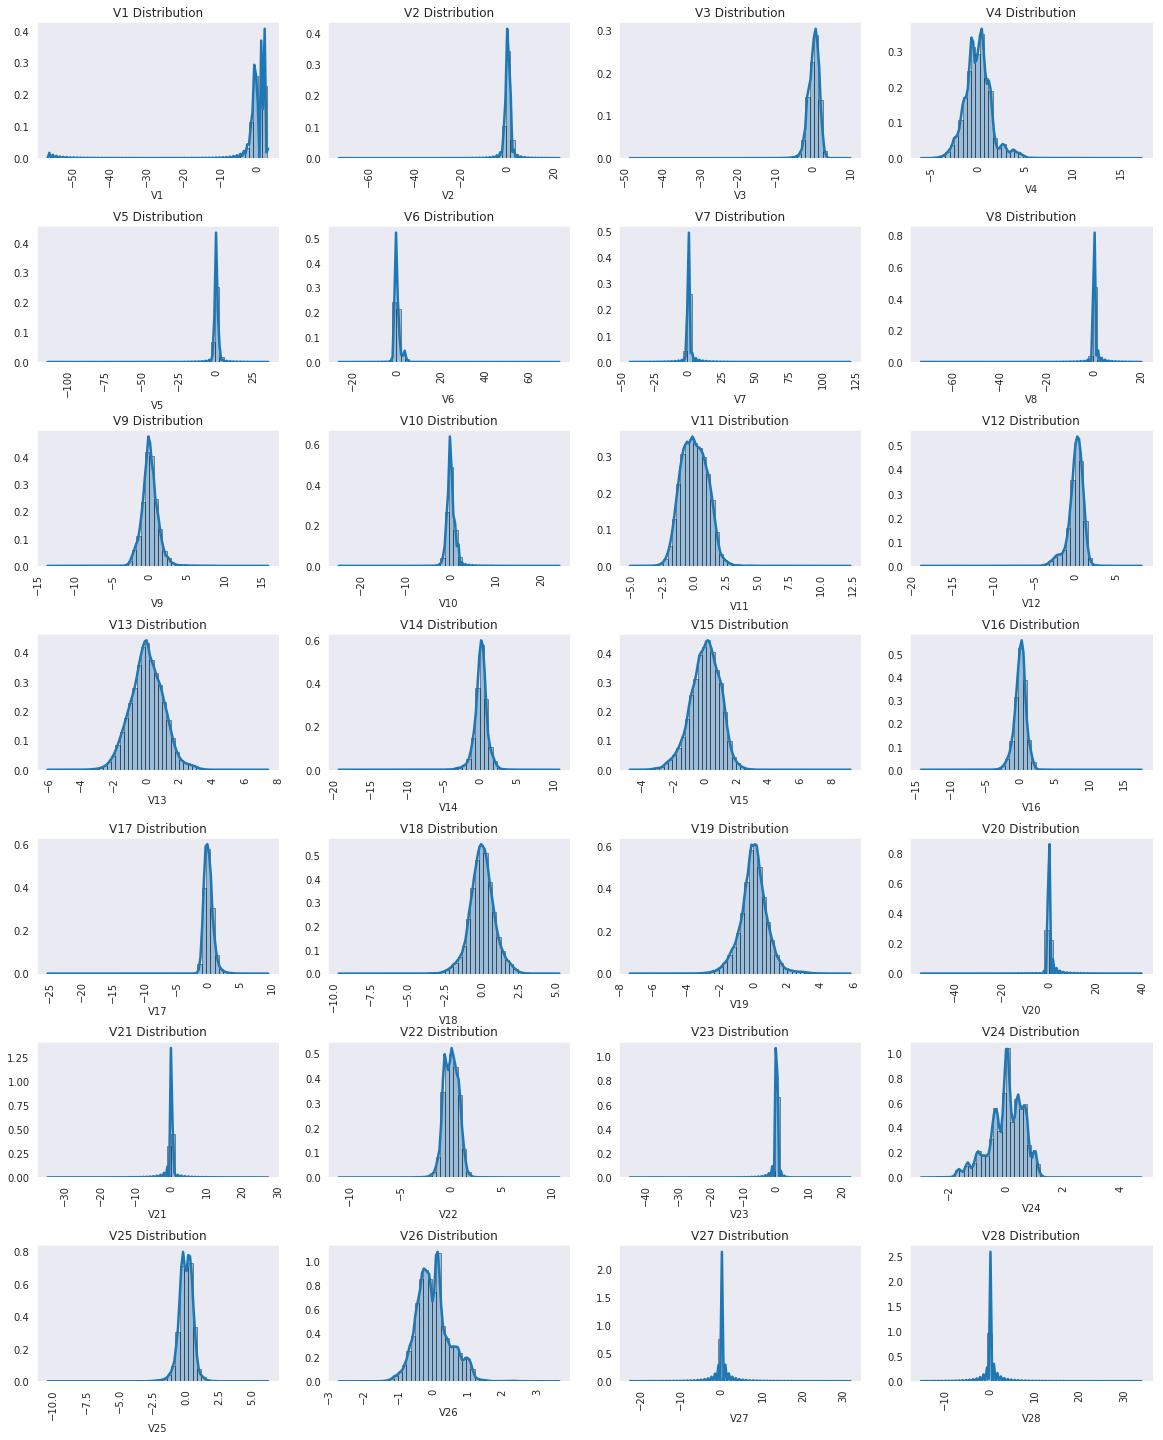

In [23]:
# plot the histogram of a variable from the dataset to see the skewness

plt.figure(figsize=(20,25))

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5

sns.set_style("dark")
rcParams['patch.force_edgecolor'] = True
rcParams['patch.edgecolor']= 'k'

pca_col_list= [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28' ]
for j in range(len(pca_col_list)):
    var=pca_col_list[j]
    plt.subplot(7, 4, j+1)
    plt.title(var+' Distribution')
    sns.distplot(X_train[var])
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.5)

In [24]:
X_train.skew()

V1        -3.306334
V2        -4.779484
V3        -2.247962
V4         0.687574
V5        -2.786851
V6         1.937381
V7         3.152665
V8        -8.639485
V9         0.541869
V10        1.132688
V11        0.354102
V12       -2.286654
V13        0.064819
V14       -1.969112
V15       -0.308419
V16       -1.077909
V17       -3.733377
V18       -0.254948
V19        0.106133
V20       -1.960492
V21        3.490183
V22       -0.219171
V23       -6.258558
V24       -0.549854
V25       -0.436292
V26        0.574980
V27       -0.890209
V28        9.978409
Amount    18.193943
dtype: float64

### <font color = blue> Power Transformer </font>

In [25]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
X_train_new = X_train.copy()
pt_new = PowerTransformer()
X_train_new[pca_col_list] = pt_new.fit_transform(X_train_new[pca_col_list])
X_train_new.skew()

V1        -0.218136
V2         0.336876
V3        -0.079701
V4         0.019656
V5        -1.349420
V6        -2.001738
V7         2.883669
V8         2.382707
V9        -0.049934
V10       -1.329089
V11        0.062098
V12        0.162452
V13        0.006358
V14        0.101347
V15        0.013679
V16        0.156780
V17       -0.805442
V18       -0.058739
V19        0.015386
V20       -0.879795
V21       -2.076984
V22       -0.027718
V23       -0.255033
V24        0.113940
V25        0.076555
V26       -0.024692
V27        3.731696
V28        1.320689
Amount    18.193943
dtype: float64

In [26]:
X_train_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.336188,-0.544845,-0.965606,-0.420795,1.098808,2.530347,-1.195983,1.193358,1.254348,-0.106992,-0.066314,0.455748,0.072358,-0.150225,1.531943,0.352829,-0.924246,0.149650,-0.549506,-0.176355,0.122260,0.393491,0.490592,1.218731,-0.694570,-0.802560,0.182260,-0.090864,7.32
180305,1.425774,-0.116737,-1.776576,0.252512,2.186342,2.157106,-0.000786,0.641573,0.094536,0.304136,-0.208442,0.208679,-0.399209,0.766264,-0.219143,-0.892874,-0.359582,-0.834919,-0.329758,-0.296564,0.070475,0.296106,0.045872,1.252675,0.995295,-1.009446,-0.005501,-0.205597,2.99
42664,-0.754387,0.330483,0.399881,-0.685256,-0.605729,1.414925,-1.789942,-3.636030,0.053256,-2.010828,-0.343141,2.650201,0.756416,0.056656,-1.771940,1.391102,-0.878343,0.156057,0.014625,1.674510,-4.186769,0.130424,-0.705914,-1.454362,1.664636,1.729490,0.083143,0.579844,175.10
198723,1.686538,-0.960299,-0.630097,-1.249409,-1.008630,-0.179880,-1.154125,-0.068541,-1.042182,1.564049,0.137776,-0.866443,-0.463715,-0.285627,-0.728457,-0.153416,0.050786,0.916365,0.324058,-0.636737,-0.177824,0.085261,0.327068,-0.924640,-0.562276,-0.262825,0.033199,-0.186850,6.10
82325,-0.504203,-0.692345,-0.071695,-2.857635,0.512868,-0.008022,0.407953,-0.188334,0.011243,-0.498444,-0.204561,-0.241971,-0.784132,0.069992,-0.570037,-2.148274,-0.509015,1.960380,-0.092901,-0.358673,-0.323872,-0.258893,-0.022355,-1.981799,-0.588381,-0.223254,-0.092790,-0.190564,86.10


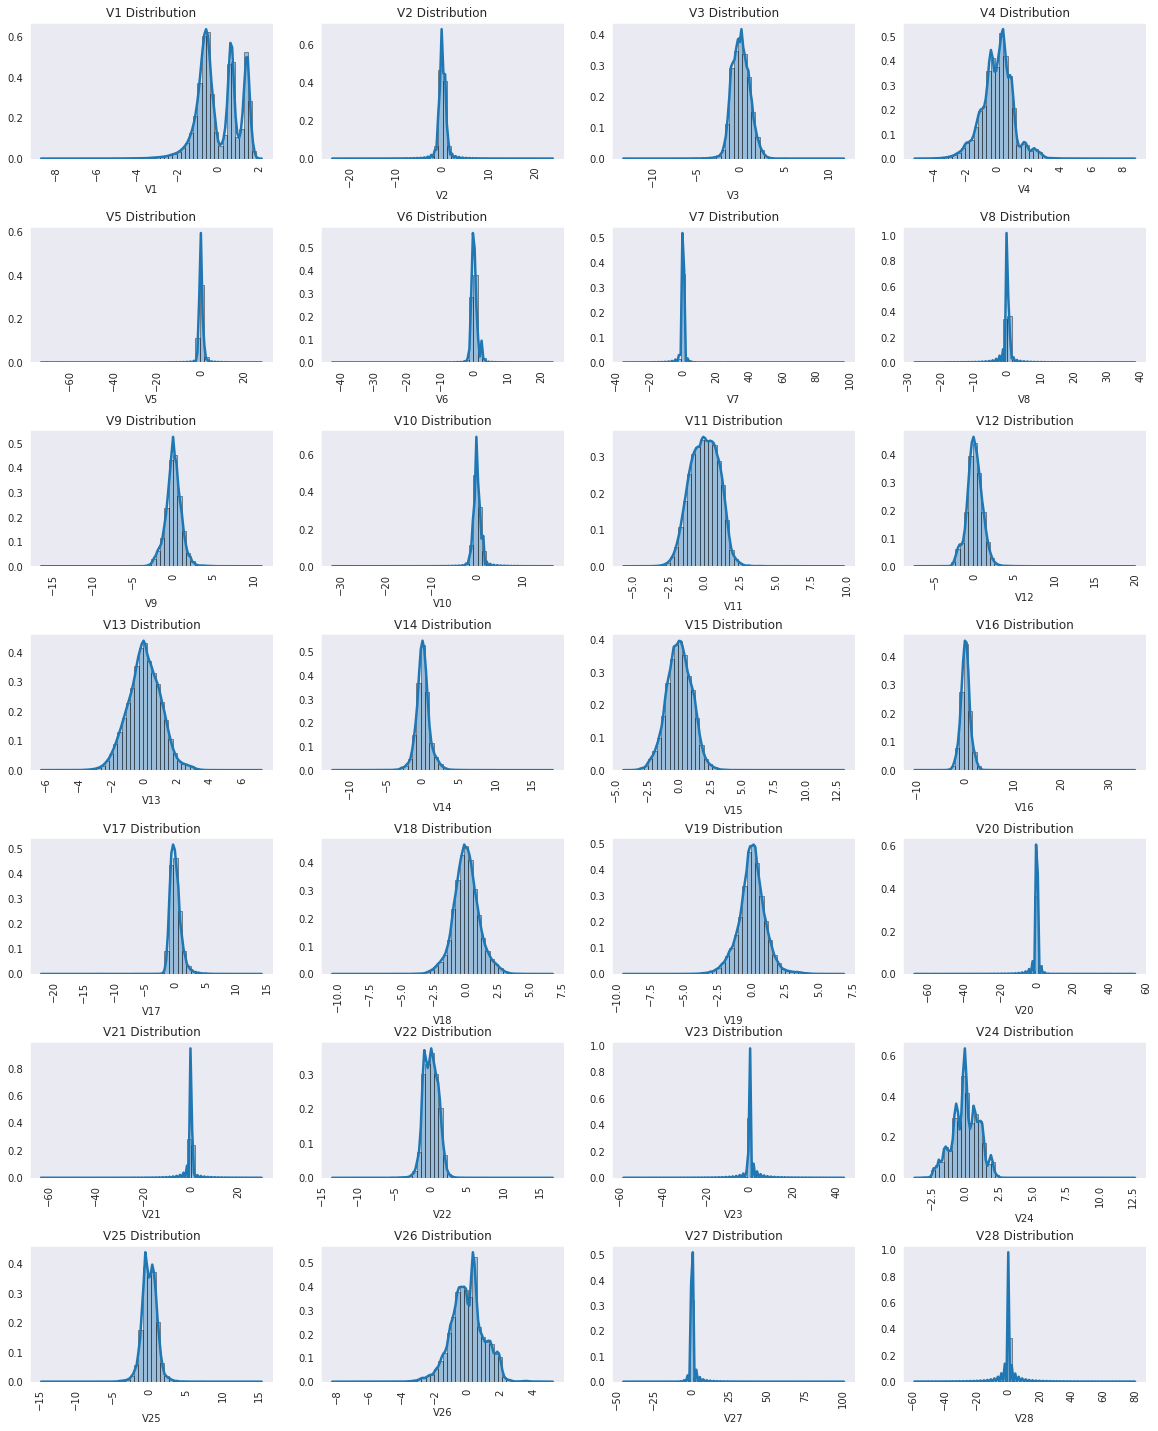

In [27]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20,25))

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5

sns.set_style("dark")
rcParams['patch.force_edgecolor'] = True
rcParams['patch.edgecolor']= 'k'

pca_col_list= [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28' ]
for j in range(len(pca_col_list)):
    var=pca_col_list[j]
    plt.subplot(7, 4, j+1)
    plt.title(var+' Distribution')
    sns.distplot(X_train_new[var])
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.5)

In [28]:
X_test.skew()

V1        -3.177927
V2        -4.018595
V3        -2.209282
V4         0.631184
V5        -0.992717
V6         1.388555
V7         0.119547
V8        -8.067224
V9         0.605124
V10        1.397098
V11        0.365768
V12       -2.245907
V13        0.066791
V14       -2.094954
V15       -0.308434
V16       -1.190340
V17       -4.249350
V18       -0.279867
V19        0.121422
V20       -2.343294
V21        4.007982
V22       -0.189594
V23       -4.222505
V24       -0.563037
V25       -0.333933
V26        0.583512
V27       -2.345941
V28       15.393577
Amount    11.930076
dtype: float64

### <font color = blue> Apply power transformation on test data </font>

In [29]:
X_test[pca_col_list] = pt_new.transform(X_test[pca_col_list])
X_test.skew()

V1        -0.215497
V2         0.522200
V3        -0.091975
V4        -0.014536
V5        -0.229512
V6        -1.399932
V7        -0.008607
V8         3.025981
V9         0.019256
V10       -0.906923
V11        0.081283
V12        0.156379
V13        0.007727
V14        0.023863
V15        0.009756
V16       -0.047025
V17       -1.091596
V18       -0.079975
V19        0.030252
V20       -1.506377
V21       -1.193539
V22        0.006564
V23        0.178225
V24        0.086026
V25        0.148731
V26       -0.009469
V27       -0.547468
V28        7.205336
Amount    11.930076
dtype: float64

### <font color = blue> Apply scaling on Amount variable in Training data </font>

In [30]:
# Scale the numerical data to remove disparities in magnitude and scales of numerical variables
scaler = StandardScaler()

X_train_new['Amount'] = scaler.fit_transform(X_train_new['Amount'].values.reshape(-1, 1))
X_train_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.336188,-0.544845,-0.965606,-0.420795,1.098808,2.530347,-1.195983,1.193358,1.254348,-0.106992,-0.066314,0.455748,0.072358,-0.150225,1.531943,0.352829,-0.924246,0.149650,-0.549506,-0.176355,0.122260,0.393491,0.490592,1.218731,-0.694570,-0.802560,0.182260,-0.090864,-0.322494
180305,1.425774,-0.116737,-1.776576,0.252512,2.186342,2.157106,-0.000786,0.641573,0.094536,0.304136,-0.208442,0.208679,-0.399209,0.766264,-0.219143,-0.892874,-0.359582,-0.834919,-0.329758,-0.296564,0.070475,0.296106,0.045872,1.252675,0.995295,-1.009446,-0.005501,-0.205597,-0.339764
42664,-0.754387,0.330483,0.399881,-0.685256,-0.605729,1.414925,-1.789942,-3.636030,0.053256,-2.010828,-0.343141,2.650201,0.756416,0.056656,-1.771940,1.391102,-0.878343,0.156057,0.014625,1.674510,-4.186769,0.130424,-0.705914,-1.454362,1.664636,1.729490,0.083143,0.579844,0.346693
198723,1.686538,-0.960299,-0.630097,-1.249409,-1.008630,-0.179880,-1.154125,-0.068541,-1.042182,1.564049,0.137776,-0.866443,-0.463715,-0.285627,-0.728457,-0.153416,0.050786,0.916365,0.324058,-0.636737,-0.177824,0.085261,0.327068,-0.924640,-0.562276,-0.262825,0.033199,-0.186850,-0.327360
82325,-0.504203,-0.692345,-0.071695,-2.857635,0.512868,-0.008022,0.407953,-0.188334,0.011243,-0.498444,-0.204561,-0.241971,-0.784132,0.069992,-0.570037,-2.148274,-0.509015,1.960380,-0.092901,-0.358673,-0.323872,-0.258893,-0.022355,-1.981799,-0.588381,-0.223254,-0.092790,-0.190564,-0.008281


In [31]:
X_train_new['Amount'].describe(percentiles=[0.05,0.15,0.25,0.5,0.75,0.85,0.9,0.95,0.99])

count    2.278450e+05
mean    -4.743622e-16
std      1.000002e+00
min     -3.516894e-01
5%      -3.480200e-01
15%     -3.437922e-01
25%     -3.291944e-01
50%     -2.639429e-01
75%     -4.262209e-02
85%      2.066978e-01
90%      4.617611e-01
95%      1.095052e+00
99%      3.686009e+00
max      1.021170e+02
Name: Amount, dtype: float64

### <font color = blue> Apply scaling on Amount variable in test data </font>

In [32]:
# Scale the numerical data to remove disparities in magnitude and scales of numerical variables

X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
263020,-0.612888,0.938921,-0.834620,-0.962055,1.013637,-1.082636,1.520661,-0.637708,0.333154,0.629991,-0.836532,-0.422767,-0.190824,0.219774,-0.108896,-0.880073,-0.744398,-0.483633,-0.191485,0.511544,0.127609,1.124534,-0.370722,1.254384,-0.297643,0.187989,1.346559,0.901741,-0.259954
11378,-1.417126,-1.607494,2.178053,-0.752225,2.109658,-1.976296,-1.451882,-0.315661,2.545285,-0.944518,1.734029,-1.477662,1.253838,1.074516,-0.568004,-0.246254,-0.287403,1.279090,0.494052,-0.669131,-0.398095,0.130116,-1.292190,-0.025126,-0.091979,-2.204635,0.265540,-1.617581,-0.304426
147283,-1.640018,1.681809,0.930972,2.077638,0.818726,1.925818,1.165118,-0.726155,1.626696,5.803793,1.931559,-0.252102,0.587697,-2.269298,1.759210,-1.367173,-0.498489,-1.446112,0.130092,2.669907,-1.512342,0.001991,-0.223649,-2.123633,-0.595314,0.224593,1.394731,1.556835,-0.048286
219439,1.451583,-0.095041,-0.819256,0.346817,-0.029901,-0.850506,0.168725,-0.395860,0.458873,0.086580,-0.619215,0.802725,0.675031,0.096910,-0.027785,-0.273124,-0.383392,-1.192949,0.128011,-0.250938,-0.378384,-0.885681,0.529978,-0.210904,-0.572655,0.505456,-0.169753,-0.177699,-0.347741
36939,0.641805,0.920210,-0.959501,1.217385,0.473381,-1.932109,0.689841,-0.518254,-0.549414,-1.549639,1.396269,0.061729,0.743311,-3.114438,1.027262,0.988966,3.832264,1.256582,-1.293119,0.009800,-0.212039,-0.469117,-0.259710,1.069648,1.647954,-0.659282,0.105231,0.332373,-0.345707


## <font color = blue> PART-4: MODEL BUILDING </font>

In [33]:
# Create empty dataframe for storing scoring across the models
model_scores_df = pd.DataFrame(columns=['clf', 'train_data', 'train_recall', 'train_preci', 'train_f1', 'train_speci', 'train_roc_auc' , 'test_recall', 'test_preci', 'test_f1', 'test_speci', 'test_roc_auc'])

In [34]:
# Define function to draw ROC curve
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [35]:
# Define function for cutoff table computation
def cutoff_table(y_actual_thresholds):
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci'])
    from sklearn.metrics import confusion_matrix

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_actual_thresholds.Class, y_actual_thresholds[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
    
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci]
    
    print(cutoff_df)
    cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci','preci'])
    plt.show()
    
    return None

In [36]:
# Define function to print and compute confusion matrix and classification scores
def confusion_scores(y_actual_predprob):
    # Confusion Matrix
    prob_confusion_imb = metrics.confusion_matrix(y_actual_predprob.Class,y_actual_predprob.Class_final_predicted)
    print(prob_confusion_imb)
    sns.set_style("dark")
    cmap = sns.cm.rocket_r
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(prob_confusion_imb,annot=True,cmap = cmap, fmt='n', annot_kws={"size": 12})

    plt.title('Confusion matrix of the classifier') 
    plt.xlabel('Predicted') 
    plt.ylabel('Actual') 

    plt.show()    
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_actual_predprob.Class,y_actual_predprob.Class_final_predicted))
    TN=prob_confusion_imb[0,0]
    FP=prob_confusion_imb[0,1]
    FN=prob_confusion_imb[1,0]
    TP=prob_confusion_imb[1,1]
    Recall = round(100*(TP/float(FN+TP)),2)
    Precision = round(100*(precision_score(y_actual_predprob.Class, y_actual_predprob.Class_final_predicted)),2)
    f1 = round(100*(metrics.f1_score(y_actual_predprob.Class, y_actual_predprob.Class_final_predicted)),2)
    Specificity = round(100*(TN/float(TN+FP)),2)
    roc_auc = round(100*(roc_auc_score(y_actual_predprob.Class, y_actual_predprob.Class_Prob)),2)
    # SENSITIVITY
    print("Sensitivity:",Recall,"%")
    # SPECIFICITY
    print("Specificity:",Specificity,"%")
    # FALSE POSITIVE RATE
    print("FPR:",round(100*(FP/float(FP+TN)),2),"%")
    # FALSE NEGATIVE RATE
    print("FNR:",round(100*(FN/float(FN+TP)),2),"%")
    # positive predictive value
    print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")
    # negative predictive value
    print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")
    # ACCURACY SCORE
    print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")
    print("Precision Score of the Model:",Precision,"%")
    
    return Recall, Precision, f1, Specificity, roc_auc

In [37]:
def confusion_scores_final(y_actual_pred):
    # Confusion Matrix
    prob_confusion_imb = metrics.confusion_matrix(y_actual_pred.Class,y_actual_pred.Class_final_predicted)
    print(prob_confusion_imb)
    sns.set_style("dark")
    cmap = sns.cm.rocket_r
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(prob_confusion_imb,annot=True,cmap = cmap, fmt='n', annot_kws={"size": 12})

    plt.title('Confusion matrix of the classifier') 
    plt.xlabel('Predicted') 
    plt.ylabel('Actual') 

    plt.show()    
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_actual_pred.Class,y_actual_pred.Class_final_predicted))
    TN=prob_confusion_imb[0,0]
    FP=prob_confusion_imb[0,1]
    FN=prob_confusion_imb[1,0]
    TP=prob_confusion_imb[1,1]
    Recall = round(100*(TP/float(FN+TP)),2)
    Precision = round(100*(precision_score(y_actual_pred.Class, y_actual_pred.Class_final_predicted)),2)
    f1 = round(100*(metrics.f1_score(y_actual_pred.Class, y_actual_pred.Class_final_predicted)),2)
    Specificity = round(100*(TN/float(TN+FP)),2)

    # SENSITIVITY
    print("Sensitivity:",Recall,"%")
    # SPECIFICITY
    print("Specificity:",Specificity,"%")
    # FALSE POSITIVE RATE
    print("FPR:",round(100*(FP/float(FP+TN)),2),"%")
    # FALSE NEGATIVE RATE
    print("FNR:",round(100*(FN/float(FN+TP)),2),"%")
    # positive predictive value
    print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")
    # negative predictive value
    print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")
    # ACCURACY SCORE
    print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")
    print("Precision Score of the Model:",Precision,"%")
    
    return Recall, Precision, f1, Specificity

In [38]:
# Function to print the top 3 important features for the model
def important_features(classifier, X_train):
    var_imp = []
    for i in classifier.feature_importances_:
        var_imp.append(i)

    print('Top var =', X_train.columns[var_imp.index(np.sort(classifier.feature_importances_)[-1])])
    print('2nd Top var =', X_train.columns[var_imp.index(np.sort(classifier.feature_importances_)[-2])])
    print('3rd Top var =', X_train.columns[var_imp.index(np.sort(classifier.feature_importances_)[-3])])
    
    # Variable on Index-16 and Index-13 seems to be the top 2 variables
    top_var_index = var_imp.index(np.sort(classifier.feature_importances_)[-1])
    second_top_var_index = var_imp.index(np.sort(classifier.feature_importances_)[-2])

    X_train_1 = X_train.values[np.where(y_train==1.0)]
    X_train_0 = X_train.values[np.where(y_train==0.0)]

    np.random.shuffle(X_train_0)

    plt.rcParams['figure.figsize'] = [10, 6]

    plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
    plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
    plt.legend()
    
    return None

In [39]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
def plot_imbalance(X_train_new,y_train_new,sampler,df):

    classes=df['Class'].value_counts()
    normal_share=classes[0]/df['Class'].count()*100
    fraud_share=classes[1]/df['Class'].count()*100

    
    fraud_share_new=np.sum(y_train_new)/X_train_new.shape[0]*100
    normal_share_new=100-fraud_share_new

    sns.set_style("darkgrid")
  
    plt.figure(figsize=(20,8))

    plt.subplot(2, 2, 1)
    plt.title('Bar plot of Non-Fraud vs Fraud Transactions - Original Data')
    sns.countplot(x= 'Class', data = df)

    pie_labels = ['CLASS=0', 'CLASS=1']
    pie_sizes =  normal_share, fraud_share
    explode = (0.1, 0.1)  # only "explode" the 2nd slice

    plt.subplot(2, 2, 2)
    plt.pie(pie_sizes, labels=pie_labels, explode = explode, autopct='%1.1f%%',shadow=False)
    plt.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.
    plt.title('Class Imbalance - Original Data')
    plt.show()

    plt.figure(figsize=(20,8))

    plt.subplot(2, 2, 3)
    plt.title('Bar plot of Non-Fraud vs Fraud Transactions - '+ sampler)
    sns.countplot(y_train_new)

    pie_labels = ['CLASS=0', 'CLASS=1']
    pie_sizes =  normal_share_new, fraud_share_new
    explode = (0.1, 0.1)  # only "explode" the 2nd slice

    plt.subplot(2, 2, 4)
    plt.pie(pie_sizes, labels=pie_labels, explode = explode, autopct='%1.1f%%',shadow=False)
    plt.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.
    plt.title('Class Imbalance - '+ sampler)
    plt.show()

## <font color = blue> PART-5: Build Classification models on Imbalanced (original) dataset </font>

### a. Logistic Regression

In [40]:
# Logistic Regression

param_grid = {
    'C': [ 0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000 ],
    'penalty': ["l1","l2"],
    'solver' : ["saga"],
    'random_state' : [42],
    'n_jobs' : [-1]
}

num_C = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000 ]  #--> list of values
#cv_num =   5 
skf = StratifiedKFold(n_splits=5, random_state=42)
#--> list of values
lr=LogisticRegression()
grid_search_lr = GridSearchCV(estimator = lr, param_grid = param_grid, cv=skf, scoring="roc_auc",
                                          n_jobs=-1,verbose=1)

In [41]:
lr_classifier = LogisticRegression(C=100, fit_intercept=True,
                   intercept_scaling=1, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='saga', tol=0.0001, verbose=1)

In [42]:
lr_classifier.fit(X_train_new,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 15 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.2s finished


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [43]:
y_lr_train_predprob_imb = lr_classifier.predict_proba(X_train_new)[:,1]

In [44]:
y_lr_train_act_predprob_imb = pd.DataFrame({'Class':y_train, 'Class_Prob':y_lr_train_predprob_imb})
fpr, tpr, thresholds = metrics.roc_curve(y_lr_train_act_predprob_imb.Class, y_lr_train_act_predprob_imb.Class_Prob, drop_intermediate = False )

In [45]:
threshold_lr_imb = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_lr_imb)

Threshold:  0.004365237924408467


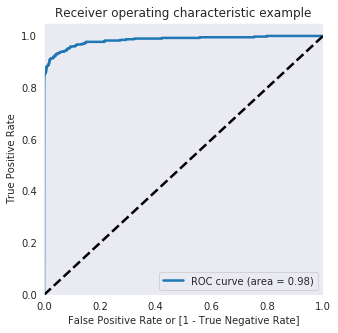

In [46]:
draw_roc(y_lr_train_act_predprob_imb.Class, y_lr_train_act_predprob_imb.Class_Prob)

In [47]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_lr_train_act_predprob_imb[i]= y_lr_train_act_predprob_imb.Class_Prob.map(lambda x: 1 if x > i else 0)
y_lr_train_act_predprob_imb.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
265518,0,0.000756,1,0,0,0,0,0,0,0,0,0
180305,0,0.001079,1,0,0,0,0,0,0,0,0,0
42664,0,0.000881,1,0,0,0,0,0,0,0,0,0
198723,0,0.001205,1,0,0,0,0,0,0,0,0,0
82325,0,0.000857,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.001729  1.000000  0.000000  0.001729
0.1   0.1  0.999359  0.804569  0.999697  0.821244
0.2   0.2  0.999425  0.763959  0.999833  0.887906
0.3   0.3  0.999386  0.730964  0.999851  0.894410
0.4   0.4  0.999289  0.672589  0.999855  0.889262
0.5   0.5  0.999228  0.629442  0.999868  0.892086
0.6   0.6  0.999197  0.596447  0.999894  0.907336
0.7   0.7  0.999153  0.571066  0.999894  0.903614
0.8   0.8  0.999070  0.522843  0.999894  0.895652
0.9   0.9  0.998960  0.459391  0.999894  0.882927


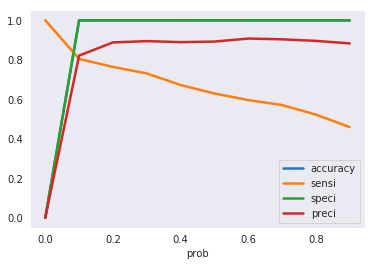

In [48]:
cutoff_table(y_lr_train_act_predprob_imb)

In [49]:
y_lr_train_act_predprob_imb['Class_final_predicted'] = y_lr_train_act_predprob_imb.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_lr_train_act_predprob_imb.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
265518,0,0.000756,1,0,0,0,0,0,0,0,0,0,0
180305,0,0.001079,1,0,0,0,0,0,0,0,0,0,0
42664,0,0.000881,1,0,0,0,0,0,0,0,0,0,0
198723,0,0.001205,1,0,0,0,0,0,0,0,0,0,0
82325,0,0.000857,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - Training Data </font>

[[227382     69]
 [    77    317]]


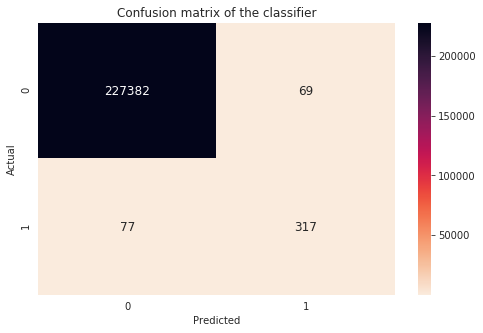

0.999359213500406
Sensitivity: 80.46 %
Specificity: 99.97 %
FPR: 0.03 %
FNR: 19.54 %
Positive Predictive Power: 82.12 %
Negative Predictive Power: 99.97 %
ACCURACY SCORE: 99.94 %
Precision Score of the Model: 82.12 %


In [50]:
train_recall_lr_imb, train_preci_lr_imb, train_f1_lr_imb, train_speci_lr_imb, train_roc_auc_lr_imb = confusion_scores(y_lr_train_act_predprob_imb)

In [51]:
y_lr_test_predprob_imb = lr_classifier.predict_proba(X_test)[:,1]
y_lr_test_act_predprob_imb = pd.DataFrame({'Class':y_test, 'Class_Prob':y_lr_test_predprob_imb})

In [52]:
y_lr_test_act_predprob_imb['Class_final_predicted'] = y_lr_test_act_predprob_imb.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_lr_test_act_predprob_imb.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.000903,0
11378,0,0.001094,0
147283,0,0.002450,0
219439,0,0.000831,0
36939,0,0.010869,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56833    31]
 [   16    82]]


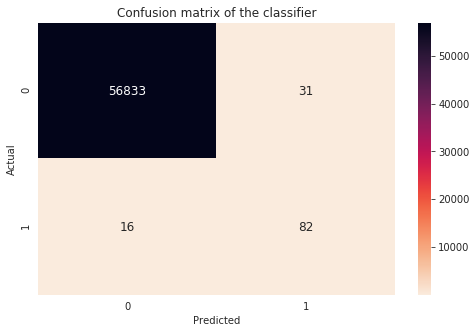

0.9991748885221726
Sensitivity: 83.67 %
Specificity: 99.95 %
FPR: 0.05 %
FNR: 16.33 %
Positive Predictive Power: 72.57 %
Negative Predictive Power: 99.97 %
ACCURACY SCORE: 99.92 %
Precision Score of the Model: 72.57 %


In [53]:
test_recall_lr_imb, test_preci_lr_imb, test_f1_lr_imb, test_speci_lr_imb, test_roc_auc_lr_imb = confusion_scores(y_lr_test_act_predprob_imb)

In [54]:
model_scores_df = model_scores_df.append({'clf' : 'log-reg', 'train_data' : 'imbalanced' , 'train_recall' : train_recall_lr_imb, 'train_preci' : train_preci_lr_imb, 'train_f1' : train_f1_lr_imb, 'train_speci' : train_speci_lr_imb, 'train_roc_auc' : train_roc_auc_lr_imb , 'test_recall' : test_recall_lr_imb, 'test_preci' : test_preci_lr_imb, 'test_f1' : test_f1_lr_imb, 'test_speci' : test_speci_lr_imb, 'test_roc_auc' : test_roc_auc_lr_imb}, ignore_index=True)

In [55]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71


### b. Decision Tree Classifier

In [56]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 21, 5),
    'min_samples_leaf': range(50, 201, 50),
    'min_samples_split': range(50, 201, 50),
    'criterion': ["entropy", "gini"],
    'random_state' : [42]
}

skf = StratifiedKFold(n_splits=5, random_state=42)
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid,
                              scoring = 'roc_auc', cv = skf, verbose = 1, n_jobs=-1)

In [57]:
dt_classifier = DecisionTreeClassifier(criterion='entropy',
                       max_depth=5, min_samples_leaf=200, min_samples_split=50,
                       random_state=42, splitter='best')

In [58]:
dt_classifier.fit(X_train_new,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [59]:
y_dt_train_predprob_imb = dt_classifier.predict_proba(X_train_new)[:,1]

In [60]:
y_dt_train_act_predprob_imb = pd.DataFrame({'Class':y_train, 'Class_Prob':y_dt_train_predprob_imb})
fpr, tpr, thresholds = metrics.roc_curve(y_dt_train_act_predprob_imb.Class, y_dt_train_act_predprob_imb.Class_Prob, drop_intermediate = False )

In [61]:
threshold_dt_imb = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_dt_imb)

Threshold:  0.0196078431372549


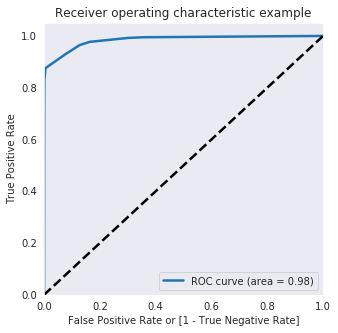

In [62]:
draw_roc(y_dt_train_act_predprob_imb.Class, y_dt_train_act_predprob_imb.Class_Prob)

In [63]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_dt_train_act_predprob_imb[i]= y_dt_train_act_predprob_imb.Class_Prob.map(lambda x: 1 if x > i else 0)
y_dt_train_act_predprob_imb.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
265518,0,0.000014,1,0,0,0,0,0,0,0,0,0
180305,0,0.000014,1,0,0,0,0,0,0,0,0,0
42664,0,0.000014,1,0,0,0,0,0,0,0,0,0
198723,0,0.000014,1,0,0,0,0,0,0,0,0,0
82325,0,0.000014,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.004986  1.000000  0.003262  0.001735
0.1   0.1  0.998613  0.829949  0.998905  0.567708
0.2   0.2  0.998613  0.829949  0.998905  0.567708
0.3   0.3  0.999052  0.695431  0.999578  0.740541
0.4   0.4  0.999052  0.695431  0.999578  0.740541
0.5   0.5  0.999052  0.695431  0.999578  0.740541
0.6   0.6  0.999052  0.695431  0.999578  0.740541
0.7   0.7  0.999052  0.695431  0.999578  0.740541
0.8   0.8  0.998271  0.000000  1.000000       NaN
0.9   0.9  0.998271  0.000000  1.000000       NaN


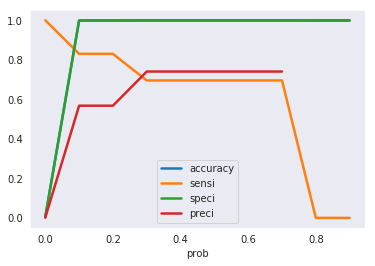

In [64]:
cutoff_table(y_dt_train_act_predprob_imb)

In [65]:
y_dt_train_act_predprob_imb['Class_final_predicted'] = y_dt_train_act_predprob_imb.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_dt_train_act_predprob_imb.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
265518,0,0.000014,1,0,0,0,0,0,0,0,0,0,0
180305,0,0.000014,1,0,0,0,0,0,0,0,0,0,0
42664,0,0.000014,1,0,0,0,0,0,0,0,0,0,0
198723,0,0.000014,1,0,0,0,0,0,0,0,0,0,0
82325,0,0.000014,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - Training Data </font>

[[227202    249]
 [    67    327]]


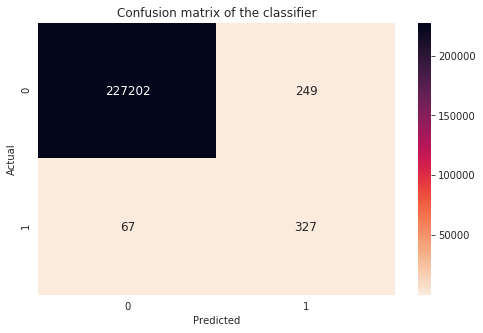

0.9986130922337554
Sensitivity: 82.99 %
Specificity: 99.89 %
FPR: 0.11 %
FNR: 17.01 %
Positive Predictive Power: 56.77 %
Negative Predictive Power: 99.97 %
ACCURACY SCORE: 99.86 %
Precision Score of the Model: 56.77 %


In [66]:
train_recall_dt_imb, train_preci_dt_imb, train_f1_dt_imb, train_speci_dt_imb, train_roc_auc_dt_imb = confusion_scores(y_dt_train_act_predprob_imb)

In [67]:
y_dt_test_predprob_imb = dt_classifier.predict_proba(X_test)[:,1]
y_dt_test_act_predprob_imb = pd.DataFrame({'Class':y_test, 'Class_Prob':y_dt_test_predprob_imb})

In [68]:
y_dt_test_act_predprob_imb['Class_final_predicted'] = y_dt_test_act_predprob_imb.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_dt_test_act_predprob_imb.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.000014,0
11378,0,0.000014,0
147283,0,0.000000,0
219439,0,0.000014,0
36939,0,0.001303,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56781    83]
 [   14    84]]


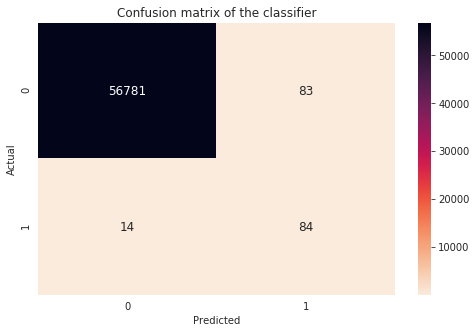

0.9982971103542713
Sensitivity: 85.71 %
Specificity: 99.85 %
FPR: 0.15 %
FNR: 14.29 %
Positive Predictive Power: 50.3 %
Negative Predictive Power: 99.98 %
ACCURACY SCORE: 99.83 %
Precision Score of the Model: 50.3 %


In [69]:
test_recall_dt_imb, test_preci_dt_imb, test_f1_dt_imb, test_speci_dt_imb, test_roc_auc_dt_imb = confusion_scores(y_dt_test_act_predprob_imb)

In [70]:
model_scores_df = model_scores_df.append({'clf' : 'dec-tree', 'train_data' : 'imbalanced' , 'train_recall' : train_recall_dt_imb, 'train_preci' : train_preci_dt_imb, 'train_f1' : train_f1_dt_imb, 'train_speci' : train_speci_dt_imb, 'train_roc_auc' : train_roc_auc_dt_imb , 'test_recall' : test_recall_dt_imb, 'test_preci' : test_preci_dt_imb, 'test_f1' : test_f1_dt_imb, 'test_speci' : test_speci_dt_imb, 'test_roc_auc' : test_roc_auc_dt_imb}, ignore_index=True)

In [71]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76


Top var = V17
2nd Top var = V14
3rd Top var = V4


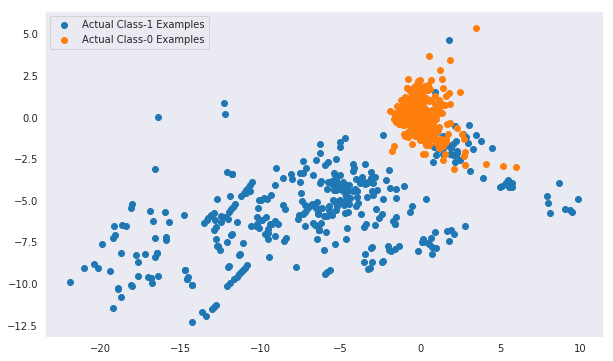

In [72]:
important_features(dt_classifier, X_train_new)

### c. Random Forest Classifier

In [73]:
# RandomForest Classifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 21, 5),
    'min_samples_leaf': range(50, 201, 50),
    'min_samples_split': range(50, 201, 50),
    'n_estimators': [100, 200, 300],
    'criterion': ["entropy", "gini"],
    'oob_score': [True, False],
    'n_jobs': [-1],
    'random_state' : [42]
}
skf = StratifiedKFold(n_splits=5, random_state=42)

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
random_search_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                                      scoring='roc_auc', cv=skf, verbose = 1, n_jobs = -1, random_state = 42)

In [74]:
rf_classifier = RandomForestClassifier(bootstrap=True, 
                       criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_leaf=150, min_samples_split=50,
                       n_estimators=100, n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [75]:
rf_classifier.fit(X_train_new,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   55.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1,
                       warm_start=False)

In [76]:
y_rf_train_predprob_imb = rf_classifier.predict_proba(X_train_new)[:,1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [77]:
y_rf_train_act_predprob_imb = pd.DataFrame({'Class':y_train, 'Class_Prob':y_rf_train_predprob_imb})
fpr, tpr, thresholds = metrics.roc_curve(y_rf_train_act_predprob_imb.Class, y_rf_train_act_predprob_imb.Class_Prob, drop_intermediate = False )

In [78]:
threshold_rf_imb = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_rf_imb)

Threshold:  0.00491085930950038


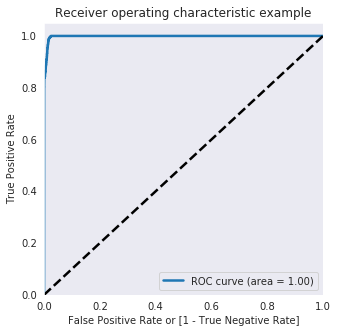

In [79]:
draw_roc(y_rf_train_act_predprob_imb.Class, y_rf_train_act_predprob_imb.Class_Prob)

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_rf_train_act_predprob_imb[i]= y_rf_train_act_predprob_imb.Class_Prob.map(lambda x: 1 if x > i else 0)
y_rf_train_act_predprob_imb.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
265518,0,0.000000,0,0,0,0,0,0,0,0,0,0
180305,0,0.000118,1,0,0,0,0,0,0,0,0,0
42664,0,0.001186,1,0,0,0,0,0,0,0,0,0
198723,0,0.000000,0,0,0,0,0,0,0,0,0,0
82325,0,0.000000,0,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.500564  1.000000  0.499699  0.003450
0.1   0.1  0.998833  0.837563  0.999112  0.620301
0.2   0.2  0.999386  0.794416  0.999741  0.841398
0.3   0.3  0.999407  0.761421  0.999820  0.879765
0.4   0.4  0.999311  0.700508  0.999829  0.876190
0.5   0.5  0.999105  0.563452  0.999859  0.874016
0.6   0.6  0.998955  0.467005  0.999877  0.867925
0.7   0.7  0.998530  0.195431  0.999921  0.810526
0.8   0.8  0.998271  0.000000  1.000000       NaN
0.9   0.9  0.998271  0.000000  1.000000       NaN


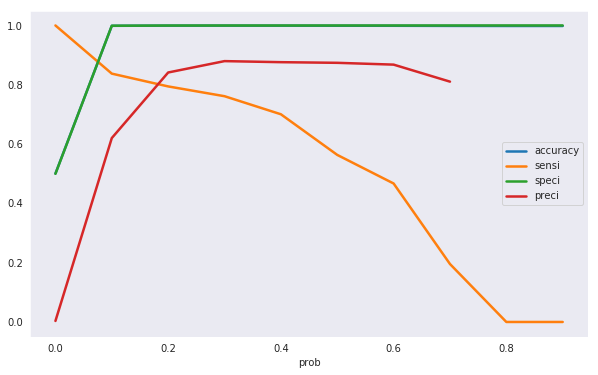

In [81]:
cutoff_table(y_rf_train_act_predprob_imb)

In [82]:
y_rf_train_act_predprob_imb['Class_final_predicted'] = y_rf_train_act_predprob_imb.Class_Prob.map( lambda x: 1 if x > 0.18 else 0)
y_rf_train_act_predprob_imb.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
265518,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
180305,0,0.000118,1,0,0,0,0,0,0,0,0,0,0
42664,0,0.001186,1,0,0,0,0,0,0,0,0,0,0
198723,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
82325,0,0.000000,0,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - Training Data </font>

[[227372     79]
 [    77    317]]


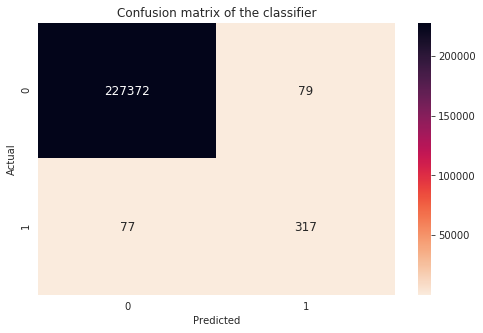

0.9993153240141324
Sensitivity: 80.46 %
Specificity: 99.97 %
FPR: 0.03 %
FNR: 19.54 %
Positive Predictive Power: 80.05 %
Negative Predictive Power: 99.97 %
ACCURACY SCORE: 99.93 %
Precision Score of the Model: 80.05 %


In [83]:
train_recall_rf_imb, train_preci_rf_imb, train_f1_rf_imb, train_speci_rf_imb, train_roc_auc_rf_imb = confusion_scores(y_rf_train_act_predprob_imb)

In [84]:
y_rf_test_predprob_imb = rf_classifier.predict_proba(X_test)[:,1]
y_rf_test_act_predprob_imb = pd.DataFrame({'Class':y_test, 'Class_Prob':y_rf_test_predprob_imb})

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [85]:
y_rf_test_act_predprob_imb['Class_final_predicted'] = y_rf_test_act_predprob_imb.Class_Prob.map( lambda x: 1 if x > 0.18 else 0)
y_rf_test_act_predprob_imb.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.000000,0
11378,0,0.000394,0
147283,0,0.011197,0
219439,0,0.000000,0
36939,0,0.010866,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56836    28]
 [   16    82]]


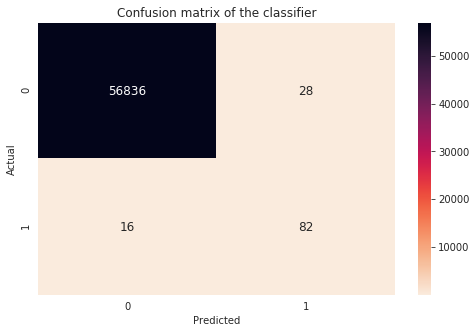

0.9992275552122467
Sensitivity: 83.67 %
Specificity: 99.95 %
FPR: 0.05 %
FNR: 16.33 %
Positive Predictive Power: 74.55 %
Negative Predictive Power: 99.97 %
ACCURACY SCORE: 99.92 %
Precision Score of the Model: 74.55 %


In [86]:
test_recall_rf_imb, test_preci_rf_imb, test_f1_rf_imb, test_speci_rf_imb, test_roc_auc_rf_imb = confusion_scores(y_rf_test_act_predprob_imb)

In [87]:
model_scores_df = model_scores_df.append({'clf' : 'ran-forest', 'train_data' : 'imbalanced' , 'train_recall' : train_recall_rf_imb, 'train_preci' : train_preci_rf_imb, 'train_f1' : train_f1_rf_imb, 'train_speci' : train_speci_rf_imb, 'train_roc_auc' : train_roc_auc_rf_imb , 'test_recall' : test_recall_rf_imb, 'test_preci' : test_preci_rf_imb, 'test_f1' : test_f1_rf_imb, 'test_speci' : test_speci_rf_imb, 'test_roc_auc' : test_roc_auc_rf_imb}, ignore_index=True)

In [88]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33


Top var = V14
2nd Top var = V17
3rd Top var = V10


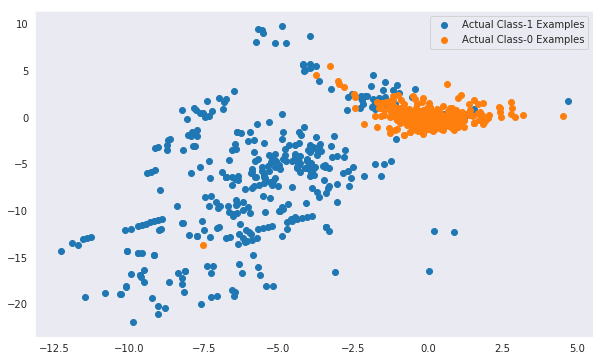

In [89]:
important_features(rf_classifier,X_train_new)

### d. XGBoost Classifier

In [90]:
# hyperparameter tuning with XGBoost

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 21, 5),
    'learning_rate': [0.2, 0.6], 
    'min_child_weight': [1, 3, 5 ],
    'subsample': [0.3, 0.6, 0.9],
    'n_estimators': [100, 200, 300],
    'gamma' : [0.1, 0.3, 0.5],
    'reg_lambda' : [0, 0.2, 0.4],
    'reg_alpha': [0, 0.5, 1],
    'n_jobs': [-1],
    'random_state' : [42],
    'verbosity' : [1],
    'booster' : ["gbtree"],
    'gpu_id' : [0],
    'tree_method' : ['gpu_hist']
}

# creating a KFold object 
skf = StratifiedKFold(n_splits=5, random_state=42)

# Create a based model
xgb = XGBClassifier()
# Instantiate the ramdomized search model
random_search_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, n_iter = 20, 
                                      scoring='roc_auc', cv=skf, verbose = 1, n_jobs = -1, random_state = 42)

In [91]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', 
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=3, 
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=1,
              reg_lambda=0.2, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist',  verbosity=1)

In [92]:
# fit model on training data
xgb_classifier.fit(X_train_new,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=1,
              reg_lambda=0.2, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=False, verbosity=1)

In [93]:
y_xgb_train_predprob_imb = xgb_classifier.predict_proba(X_train_new)[:,1]

In [94]:
y_xgb_train_act_predprob_imb = pd.DataFrame({'Class':y_train, 'Class_Prob':y_xgb_train_predprob_imb})
fpr, tpr, thresholds = metrics.roc_curve(y_xgb_train_act_predprob_imb.Class, y_xgb_train_act_predprob_imb.Class_Prob, drop_intermediate = False )

In [95]:
threshold_xgb_imb = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_xgb_imb)

Threshold:  0.32024774


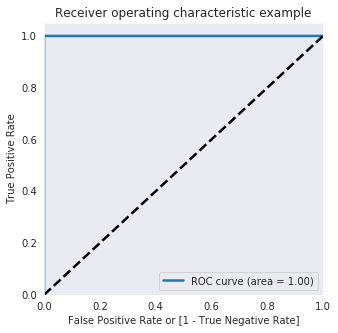

In [96]:
draw_roc(y_xgb_train_act_predprob_imb.Class, y_xgb_train_act_predprob_imb.Class_Prob)

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_xgb_train_act_predprob_imb[i]= y_xgb_train_act_predprob_imb.Class_Prob.map(lambda x: 1 if x > i else 0)
y_xgb_train_act_predprob_imb.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
265518,0,9.222545e-06,1,0,0,0,0,0,0,0,0,0
180305,0,1.130973e-06,1,0,0,0,0,0,0,0,0,0
42664,0,4.547174e-05,1,0,0,0,0,0,0,0,0,0
198723,0,1.652090e-06,1,0,0,0,0,0,0,0,0,0
82325,0,9.654240e-07,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.001729  1.000000  0.000000  0.001729
0.1   0.1  0.999917  1.000000  0.999916  0.953995
0.2   0.2  0.999974  1.000000  0.999974  0.985000
0.3   0.3  0.999987  1.000000  0.999987  0.992443
0.4   0.4  0.999978  0.989848  0.999996  0.997442
0.5   0.5  0.999974  0.984772  1.000000  1.000000
0.6   0.6  0.999943  0.967005  1.000000  1.000000
0.7   0.7  0.999877  0.928934  1.000000  1.000000
0.8   0.8  0.999759  0.860406  1.000000  1.000000
0.9   0.9  0.999640  0.791878  1.000000  1.000000


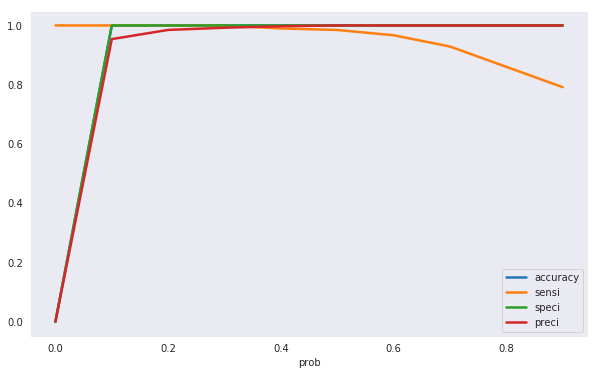

In [98]:
cutoff_table(y_xgb_train_act_predprob_imb)

In [99]:
y_xgb_train_act_predprob_imb['Class_final_predicted'] = y_xgb_train_act_predprob_imb.Class_Prob.map( lambda x: 1 if x > threshold_xgb_imb else 0)
y_xgb_train_act_predprob_imb.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
265518,0,9.222545e-06,1,0,0,0,0,0,0,0,0,0,0
180305,0,1.130973e-06,1,0,0,0,0,0,0,0,0,0,0
42664,0,4.547174e-05,1,0,0,0,0,0,0,0,0,0,0
198723,0,1.652090e-06,1,0,0,0,0,0,0,0,0,0,0
82325,0,9.654240e-07,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - Training Data </font>

[[227448      3]
 [     1    393]]


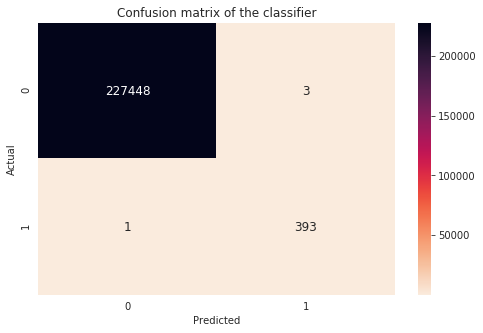

0.9999824442054905
Sensitivity: 99.75 %
Specificity: 100.0 %
FPR: 0.0 %
FNR: 0.25 %
Positive Predictive Power: 99.24 %
Negative Predictive Power: 100.0 %
ACCURACY SCORE: 100.0 %
Precision Score of the Model: 99.24 %


In [100]:
train_recall_xgb_imb, train_preci_xgb_imb, train_f1_xgb_imb, train_speci_xgb_imb, train_roc_auc_xgb_imb = confusion_scores(y_xgb_train_act_predprob_imb)

In [101]:
y_xgb_test_predprob_imb = xgb_classifier.predict_proba(X_test)[:,1]
y_xgb_test_act_predprob_imb = pd.DataFrame({'Class':y_test, 'Class_Prob':y_xgb_test_predprob_imb})

In [102]:
y_xgb_test_act_predprob_imb['Class_final_predicted'] = y_xgb_test_act_predprob_imb.Class_Prob.map( lambda x: 1 if x > threshold_xgb_imb else 0)
y_xgb_test_act_predprob_imb.head()

,Class,Class_Prob,Class_final_predicted
263020,0,2.013568e-07,0
11378,0,2.428216e-06,0
147283,0,1.525410e-04,0
219439,0,2.239914e-07,0
36939,0,5.773273e-04,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56853    11]
 [   17    81]]


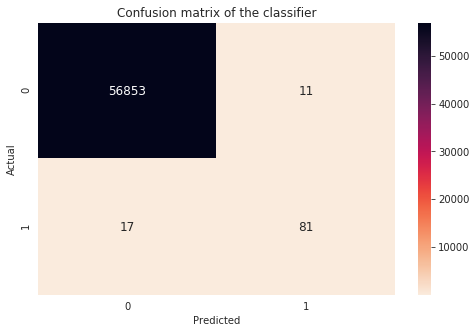

0.9995084442259752
Sensitivity: 82.65 %
Specificity: 99.98 %
FPR: 0.02 %
FNR: 17.35 %
Positive Predictive Power: 88.04 %
Negative Predictive Power: 99.97 %
ACCURACY SCORE: 99.95 %
Precision Score of the Model: 88.04 %


In [103]:
test_recall_xgb_imb, test_preci_xgb_imb, test_f1_xgb_imb, test_speci_xgb_imb, test_roc_auc_xgb_imb = confusion_scores(y_xgb_test_act_predprob_imb)

In [104]:
model_scores_df = model_scores_df.append({'clf' : 'xgboost', 'train_data' : 'imbalanced' , 'train_recall' : train_recall_xgb_imb, 'train_preci' : train_preci_xgb_imb, 'train_f1' : train_f1_xgb_imb, 'train_speci' : train_speci_xgb_imb, 'train_roc_auc' : train_roc_auc_xgb_imb , 'test_recall' : test_recall_xgb_imb, 'test_preci' : test_preci_xgb_imb, 'test_f1' : test_f1_xgb_imb, 'test_speci' : test_speci_xgb_imb, 'test_roc_auc' : test_roc_auc_xgb_imb}, ignore_index=True)

In [105]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58


Top var = V10
2nd Top var = V14
3rd Top var = V17


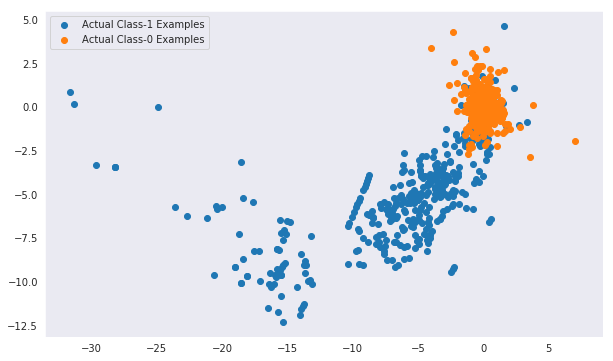

In [106]:
important_features(xgb_classifier,X_train_new)

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## <font color = blue> PART-6: Build Classification models on SMOTE dataset </font>

## SMOTE

#### <font color = blue> We are performing only oversampling of minority class to be 2% as higher oversampling and balancing leads to overfitting, prediciting multip False Positives & very poor precision </font>

In [107]:
smote_oversampler = SMOTE(sampling_strategy=0.02, random_state=42)
X_train_smt,y_train_smt = smote_oversampler.fit_resample(X_train_new,y_train)

In [108]:
print(X_train_smt.shape)
print(y_train_smt.shape)
print(np.sum(y_train_smt))
print(np.sum(y_train))
print(np.sum(y_test))

(232000, 29)
(232000,)
4549
394
98


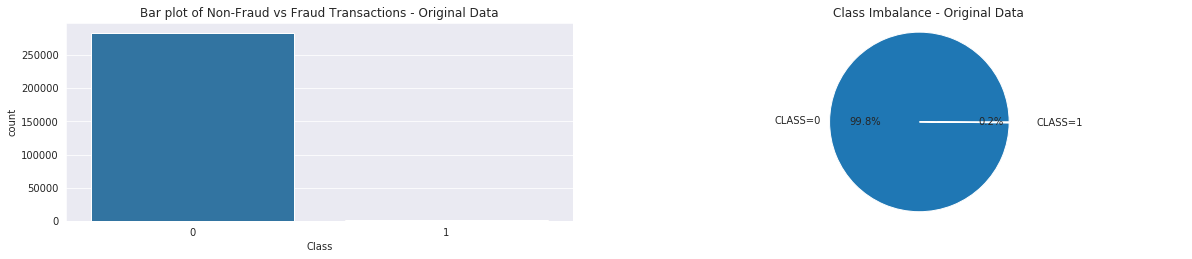

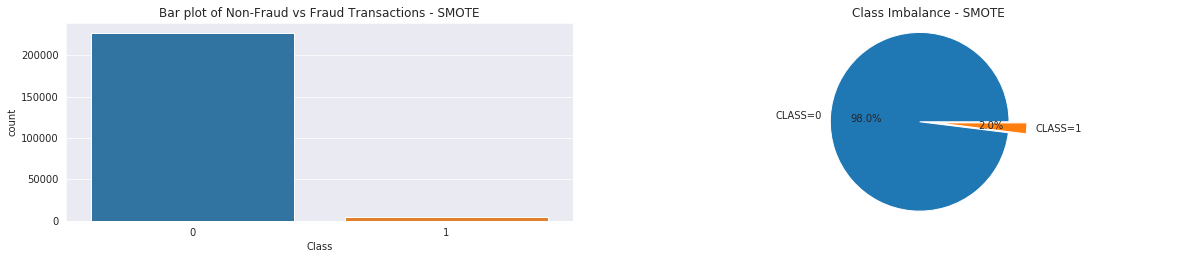

In [109]:
plot_imbalance(X_train_smt,y_train_smt,'SMOTE',df)

### a. Logistic Regression

In [110]:
# Logistic Regression

param_grid = {
    'C': [ 0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000 ],
    'penalty': ["l1","l2"],
    'solver' : ["saga"],
    'random_state' : [42],
    'n_jobs' : [-1]
}

num_C = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000 ]  #--> list of values
#cv_num =   5 
skf = StratifiedKFold(n_splits=5, random_state=42)
#--> list of values
lr=LogisticRegression()
grid_search_lr_smt = GridSearchCV(estimator = lr, param_grid = param_grid, cv=skf, scoring="roc_auc",
                                          n_jobs=-1,verbose=1)

In [111]:
lr_smt_classifier = LogisticRegression(C=0.01, fit_intercept=True,
                   intercept_scaling=1, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='saga', tol=0.0001, verbose=1)

In [112]:
lr_smt_classifier.fit(X_train_smt, y_train_smt)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 13 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.6s finished


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [113]:
y_lr_train_predprob_smt = lr_smt_classifier.predict_proba(X_train_smt)[:,1]

In [114]:
y_lr_train_act_predprob_smt = pd.DataFrame({'Class':y_train_smt, 'Class_Prob':y_lr_train_predprob_smt})
fpr, tpr, thresholds = metrics.roc_curve(y_lr_train_act_predprob_smt.Class, y_lr_train_act_predprob_smt.Class_Prob, drop_intermediate = False )

In [115]:
threshold_lr_smt = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_lr_smt)

Threshold:  0.013103914576173525


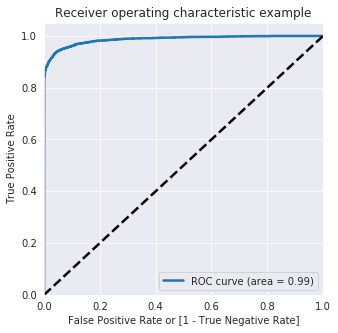

In [116]:
draw_roc(y_lr_train_act_predprob_smt.Class, y_lr_train_act_predprob_smt.Class_Prob)

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_lr_train_act_predprob_smt[i]= y_lr_train_act_predprob_smt.Class_Prob.map(lambda x: 1 if x > i else 0)
y_lr_train_act_predprob_smt.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000858,1,0,0,0,0,0,0,0,0,0
1,0,0.002063,1,0,0,0,0,0,0,0,0,0
2,0,0.000643,1,0,0,0,0,0,0,0,0,0
3,0,0.001244,1,0,0,0,0,0,0,0,0,0
4,0,0.000426,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.019608  1.000000  0.000000  0.019608
0.1   0.1  0.993543  0.865905  0.996096  0.816035
0.2   0.2  0.996004  0.844142  0.999042  0.946279
0.3   0.3  0.996246  0.837107  0.999428  0.966988
0.4   0.4  0.995978  0.817762  0.999543  0.972803
0.5   0.5  0.996000  0.814245  0.999635  0.978083
0.6   0.6  0.995966  0.810728  0.999670  0.980069
0.7   0.7  0.995806  0.801275  0.999697  0.981422
0.8   0.8  0.995466  0.781710  0.999741  0.983679
0.9   0.9  0.994815  0.743900  0.999833  0.988895


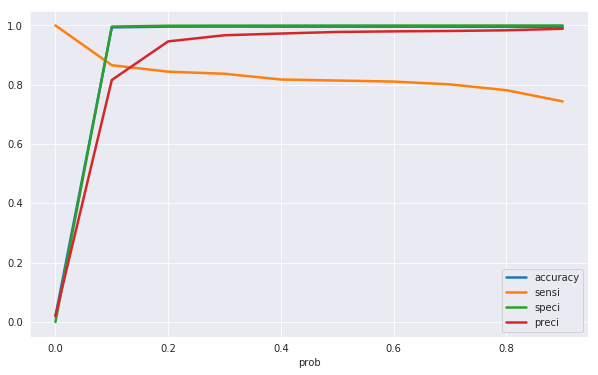

In [118]:
cutoff_table(y_lr_train_act_predprob_smt)

In [119]:
y_lr_train_act_predprob_smt['Class_final_predicted'] = y_lr_train_act_predprob_smt.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_lr_train_act_predprob_smt.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
0,0,0.000858,1,0,0,0,0,0,0,0,0,0,0
1,0,0.002063,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000643,1,0,0,0,0,0,0,0,0,0,0
3,0,0.001244,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000426,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - Training Data </font>

[[226563    888]
 [   610   3939]]


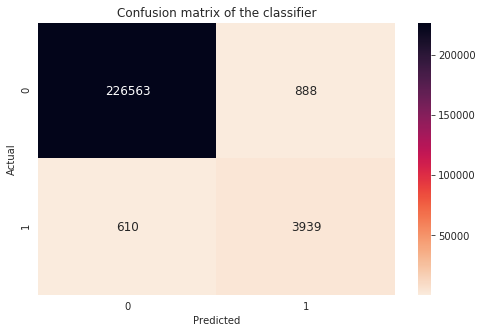

0.9935431034482759
Sensitivity: 86.59 %
Specificity: 99.61 %
FPR: 0.39 %
FNR: 13.41 %
Positive Predictive Power: 81.6 %
Negative Predictive Power: 99.73 %
ACCURACY SCORE: 99.35 %
Precision Score of the Model: 81.6 %


In [120]:
train_recall_lr_smt, train_preci_lr_smt, train_f1_lr_smt, train_speci_lr_smt, train_roc_auc_lr_smt = confusion_scores(y_lr_train_act_predprob_smt)

In [121]:
y_lr_test_predprob_smt = lr_smt_classifier.predict_proba(X_test)[:,1]
y_lr_test_act_predprob_smt = pd.DataFrame({'Class':y_test, 'Class_Prob':y_lr_test_predprob_smt})

In [122]:
y_lr_test_act_predprob_smt['Class_final_predicted'] = y_lr_test_act_predprob_smt.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_lr_test_act_predprob_smt.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.000867,0
11378,0,0.002038,0
147283,0,0.005825,0
219439,0,0.001019,0
36939,0,0.120316,1


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56617   247]
 [   11    87]]


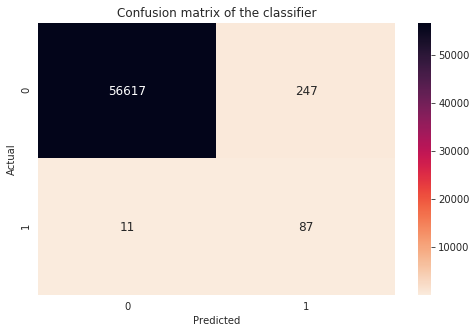

0.9954706646536288
Sensitivity: 88.78 %
Specificity: 99.57 %
FPR: 0.43 %
FNR: 11.22 %
Positive Predictive Power: 26.05 %
Negative Predictive Power: 99.98 %
ACCURACY SCORE: 99.55 %
Precision Score of the Model: 26.05 %


In [123]:
test_recall_lr_smt, test_preci_lr_smt, test_f1_lr_smt, test_speci_lr_smt, test_roc_auc_lr_smt = confusion_scores(y_lr_test_act_predprob_smt)

In [124]:
model_scores_df = model_scores_df.append({'clf' : 'log-reg', 'train_data' : 'smote' , 'train_recall' : train_recall_lr_smt, 'train_preci' : train_preci_lr_smt, 'train_f1' : train_f1_lr_smt, 'train_speci' : train_speci_lr_smt, 'train_roc_auc' : train_roc_auc_lr_smt , 'test_recall' : test_recall_lr_smt, 'test_preci' : test_preci_lr_smt, 'test_f1' : test_f1_lr_smt, 'test_speci' : test_speci_lr_smt, 'test_roc_auc' : test_roc_auc_lr_smt}, ignore_index=True)

In [125]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56


### b. Decision Tree Clasifier

In [126]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 21, 5),
    'min_samples_leaf': range(50, 201, 50),
    'min_samples_split': range(50, 201, 50),
    'criterion': ["entropy", "gini"],
    'random_state' : [42]
}

skf = StratifiedKFold(n_splits=5, random_state=42)
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt_smt = GridSearchCV(estimator = dtree, param_grid = param_grid,
                              scoring = 'roc_auc', cv = skf, verbose = 1, n_jobs=-1)


In [127]:
dt_smt_classifier = DecisionTreeClassifier(criterion='entropy',
                       max_depth=10, min_samples_leaf=200, min_samples_split=50,
                       random_state=42, splitter='best')

In [128]:
dt_smt_classifier.fit(X_train_smt,y_train_smt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [129]:
y_dt_train_predprob_smt = dt_smt_classifier.predict_proba(X_train_smt)[:,1]

In [130]:
y_dt_train_act_predprob_smt = pd.DataFrame({'Class':y_train_smt, 'Class_Prob':y_dt_train_predprob_smt})
fpr, tpr, thresholds = metrics.roc_curve(y_dt_train_act_predprob_smt.Class, y_dt_train_act_predprob_smt.Class_Prob, drop_intermediate = False )

In [131]:
threshold_dt_smt = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_dt_smt)

Threshold:  0.02


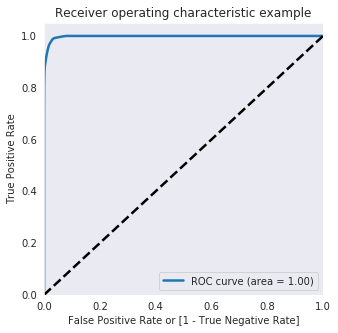

In [132]:
draw_roc(y_dt_train_act_predprob_smt.Class, y_dt_train_act_predprob_smt.Class_Prob)

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_dt_train_act_predprob_smt[i]= y_dt_train_act_predprob_smt.Class_Prob.map(lambda x: 1 if x > i else 0)
y_dt_train_act_predprob_smt.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.918629  1.000000  0.917002  0.194178
0.1   0.1  0.988621  0.932732  0.989738  0.645127
0.2   0.2  0.994884  0.885689  0.997068  0.857964
0.3   0.3  0.995918  0.867663  0.998483  0.919618
0.4   0.4  0.995918  0.867663  0.998483  0.919618
0.5   0.5  0.995991  0.834689  0.999217  0.955220
0.6   0.6  0.995914  0.810068  0.999631  0.977713
0.7   0.7  0.995914  0.810068  0.999631  0.977713
0.8   0.8  0.995914  0.810068  0.999631  0.977713
0.9   0.9  0.993966  0.694438  0.999956  0.996844


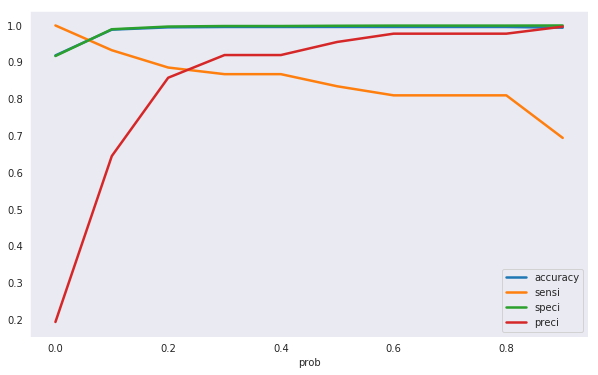

In [134]:
cutoff_table(y_dt_train_act_predprob_smt)

In [135]:
y_dt_train_act_predprob_smt['Class_final_predicted'] = y_dt_train_act_predprob_smt.Class_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_dt_train_act_predprob_smt.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
0,0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - Training Data </font>

[[227106    345]
 [   602   3947]]


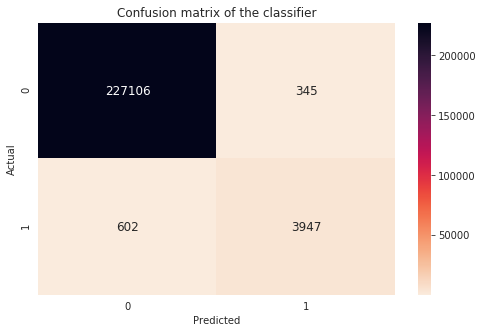

0.9959181034482759
Sensitivity: 86.77 %
Specificity: 99.85 %
FPR: 0.15 %
FNR: 13.23 %
Positive Predictive Power: 91.96 %
Negative Predictive Power: 99.74 %
ACCURACY SCORE: 99.59 %
Precision Score of the Model: 91.96 %


In [136]:
train_recall_dt_smt, train_preci_dt_smt, train_f1_dt_smt, train_speci_dt_smt, train_roc_auc_dt_smt = confusion_scores(y_dt_train_act_predprob_smt)

In [137]:
y_dt_test_predprob_smt = dt_smt_classifier.predict_proba(X_test)[:,1]
y_dt_test_act_predprob_smt = pd.DataFrame({'Class':y_test, 'Class_Prob':y_dt_test_predprob_smt})

In [138]:
y_dt_test_act_predprob_smt['Class_final_predicted'] = y_dt_test_act_predprob_smt.Class_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_dt_test_act_predprob_smt.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.000000,0
11378,0,0.000000,0
147283,0,0.115523,0
219439,0,0.000000,0
36939,0,0.000000,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56757   107]
 [   13    85]]


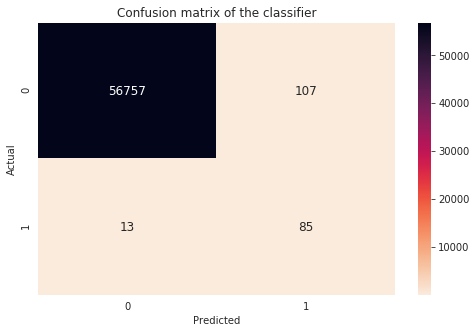

0.9978933323970366
Sensitivity: 86.73 %
Specificity: 99.81 %
FPR: 0.19 %
FNR: 13.27 %
Positive Predictive Power: 44.27 %
Negative Predictive Power: 99.98 %
ACCURACY SCORE: 99.79 %
Precision Score of the Model: 44.27 %


In [139]:
test_recall_dt_smt, test_preci_dt_smt, test_f1_dt_smt, test_speci_dt_smt, test_roc_auc_dt_smt = confusion_scores(y_dt_test_act_predprob_smt)

In [140]:
model_scores_df = model_scores_df.append({'clf' : 'dec-tree', 'train_data' : 'smote' , 'train_recall' : train_recall_dt_smt, 'train_preci' : train_preci_dt_smt, 'train_f1' : train_f1_dt_smt, 'train_speci' : train_speci_dt_smt, 'train_roc_auc' : train_roc_auc_dt_smt , 'test_recall' : test_recall_dt_smt, 'test_preci' : test_preci_dt_smt, 'test_f1' : test_f1_dt_smt, 'test_speci' : test_speci_dt_smt, 'test_roc_auc' : test_roc_auc_dt_smt}, ignore_index=True)

In [141]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56
5,dec-tree,smote,86.77,91.96,89.29,99.85,99.80,86.73,44.27,58.62,99.81,94.84


Top var = V14
2nd Top var = V10
3rd Top var = V17


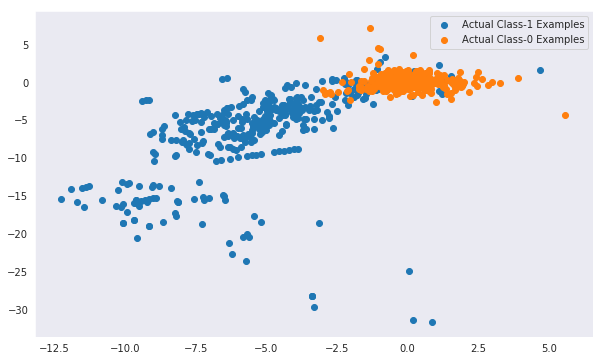

In [142]:
important_features(dt_smt_classifier, X_train_smt)

### c. Random Forest Classifier

In [143]:
# RandomForest Classifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 21, 5),
    'min_samples_leaf': range(50, 201, 50),
    'min_samples_split': range(50, 201, 50),
    'n_estimators': [100, 200, 300],
    'criterion': ["entropy", "gini"],
    'oob_score': [True, False],
    'n_jobs': [-1],
    'random_state' : [42]
}
skf = StratifiedKFold(n_splits=5, random_state=42)

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
random_search_rf_smt = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                                      scoring='roc_auc', cv=skf, verbose = 1, n_jobs = -1, random_state = 42)

In [144]:
rf_smt_classifier = RandomForestClassifier(bootstrap=True, 
                       criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=50, min_samples_split=150,
                       n_estimators=100, n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [145]:
rf_smt_classifier.fit(X_train_smt,y_train_smt)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1,
                       warm_start=False)

In [146]:
y_rf_train_predprob_smt = rf_smt_classifier.predict_proba(X_train_smt)[:,1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [147]:
y_rf_train_act_predprob_smt = pd.DataFrame({'Class':y_train_smt, 'Class_Prob':y_rf_train_predprob_smt})
fpr, tpr, thresholds = metrics.roc_curve(y_rf_train_act_predprob_smt.Class, y_rf_train_act_predprob_smt.Class_Prob, drop_intermediate = False )

In [148]:
threshold_rf_smt = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_rf_smt)

Threshold:  0.04991057969905635


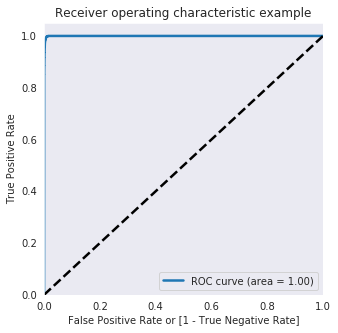

In [149]:
draw_roc(y_rf_train_act_predprob_smt.Class, y_rf_train_act_predprob_smt.Class_Prob)

In [150]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_rf_train_act_predprob_smt[i]= y_rf_train_act_predprob_smt.Class_Prob.map(lambda x: 1 if x > i else 0)
y_rf_train_act_predprob_smt.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000001,1,0,0,0,0,0,0,0,0,0
1,0,0.000000,0,0,0,0,0,0,0,0,0,0
2,0,0.003670,1,0,0,0,0,0,0,0,0,0
3,0,0.000030,1,0,0,0,0,0,0,0,0,0
4,0,0.000444,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.174246  1.000000  0.157731  0.023195
0.1   0.1  0.996534  0.974060  0.996984  0.865937
0.2   0.2  0.997103  0.902616  0.998993  0.947174
0.3   0.3  0.996845  0.869642  0.999389  0.966056
0.4   0.4  0.996763  0.856452  0.999569  0.975463
0.5   0.5  0.996720  0.847439  0.999705  0.982917
0.6   0.6  0.996388  0.826555  0.999785  0.987136
0.7   0.7  0.995996  0.804133  0.999833  0.989719
0.8   0.8  0.995444  0.772917  0.999894  0.993220
0.9   0.9  0.994060  0.699055  0.999960  0.997178


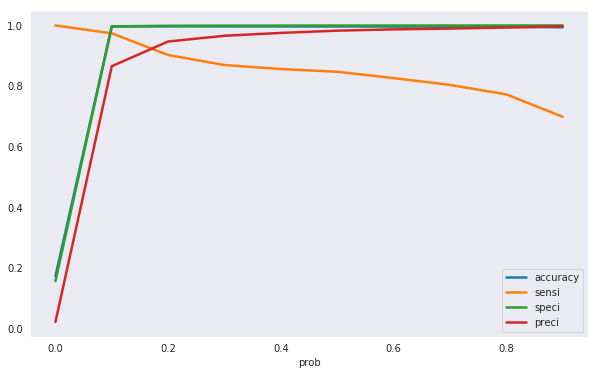

In [151]:
cutoff_table(y_rf_train_act_predprob_smt)

In [152]:
y_rf_train_act_predprob_smt['Class_final_predicted'] = y_rf_train_act_predprob_smt.Class_Prob.map( lambda x: 1 if x > 0.2 else 0)
y_rf_train_act_predprob_smt.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
0,0,0.000001,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
2,0,0.003670,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000030,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000444,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - Training Data </font>

[[227222    229]
 [   443   4106]]


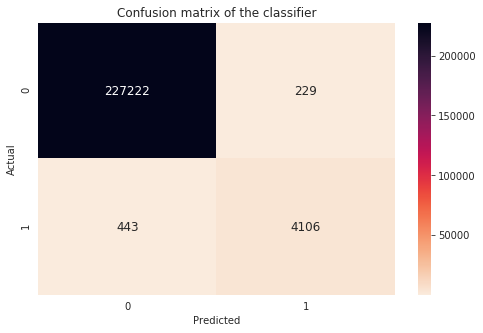

0.9971034482758621
Sensitivity: 90.26 %
Specificity: 99.9 %
FPR: 0.1 %
FNR: 9.74 %
Positive Predictive Power: 94.72 %
Negative Predictive Power: 99.81 %
ACCURACY SCORE: 99.71 %
Precision Score of the Model: 94.72 %


In [153]:
train_recall_rf_smt, train_preci_rf_smt, train_f1_rf_smt, train_speci_rf_smt, train_roc_auc_rf_smt = confusion_scores(y_rf_train_act_predprob_smt)

In [154]:
y_rf_test_predprob_smt = rf_smt_classifier.predict_proba(X_test)[:,1]
y_rf_test_act_predprob_smt = pd.DataFrame({'Class':y_test, 'Class_Prob':y_rf_test_predprob_smt})

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [155]:
y_rf_test_act_predprob_smt['Class_final_predicted'] = y_rf_test_act_predprob_smt.Class_Prob.map( lambda x: 1 if x > 0.2 else 0)
y_rf_test_act_predprob_smt.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.000000,0
11378,0,0.000371,0
147283,0,0.050250,0
219439,0,0.000000,0
36939,0,0.064643,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56785    79]
 [   11    87]]


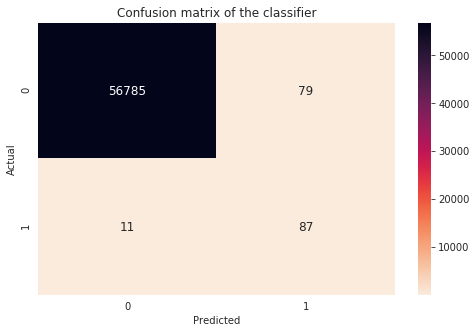

0.9984199992977775
Sensitivity: 88.78 %
Specificity: 99.86 %
FPR: 0.14 %
FNR: 11.22 %
Positive Predictive Power: 52.41 %
Negative Predictive Power: 99.98 %
ACCURACY SCORE: 99.84 %
Precision Score of the Model: 52.41 %


In [156]:
test_recall_rf_smt, test_preci_rf_smt, test_f1_rf_smt, test_speci_rf_smt, test_roc_auc_rf_smt = confusion_scores(y_rf_test_act_predprob_smt)

In [157]:
model_scores_df = model_scores_df.append({'clf' : 'ran-forest', 'train_data' : 'smote' , 'train_recall' : train_recall_rf_smt, 'train_preci' : train_preci_rf_smt, 'train_f1' : train_f1_rf_smt, 'train_speci' : train_speci_rf_smt, 'train_roc_auc' : train_roc_auc_rf_smt , 'test_recall' : test_recall_rf_smt, 'test_preci' : test_preci_rf_smt, 'test_f1' : test_f1_rf_smt, 'test_speci' : test_speci_rf_smt, 'test_roc_auc' : test_roc_auc_rf_smt}, ignore_index=True)

In [158]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56
5,dec-tree,smote,86.77,91.96,89.29,99.85,99.80,86.73,44.27,58.62,99.81,94.84
6,ran-forest,smote,90.26,94.72,92.44,99.90,99.97,88.78,52.41,65.91,99.86,98.28


Top var = V14
2nd Top var = V10
3rd Top var = V17


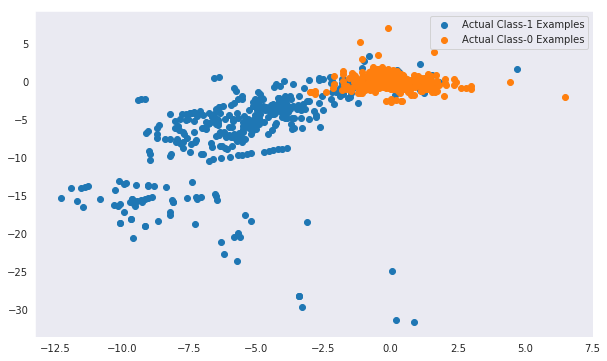

In [159]:
important_features(rf_smt_classifier, X_train_smt)

### d. XGBoost Classifier

In [160]:
# hyperparameter tuning with XGBoost

# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 21, 5),
    'learning_rate': [0.2, 0.6], 
    'min_child_weight': [1, 3, 5 ],
    'subsample': [0.3, 0.6, 0.9],
    'n_estimators': [100, 200, 300],
    'gamma' : [0.1, 0.3, 0.5],
    'reg_lambda' : [0, 0.2, 0.4],
    'reg_alpha': [0, 0.5, 1],
    'n_jobs': [-1],
    'random_state' : [42],
    'verbosity' : [1],
    'booster' : ["gbtree"],
    'gpu_id' : [0],
    'tree_method' : ['gpu_hist']
}


# creating a KFold object 
skf = StratifiedKFold(n_splits=5, random_state=42)

# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
random_search_smt_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, n_iter = 20,
                                      scoring='roc_auc', cv=skf, verbose = 1, n_jobs = -1, random_state = 42)

In [161]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

xgb_smt_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', 
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=3, 
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=1,
              reg_lambda=0.2, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=False, verbosity=1)

In [162]:
# fit model on training data
xgb_smt_classifier.fit(X_train_smt,y_train_smt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=1,
              reg_lambda=0.2, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=False, verbosity=1)

In [163]:
y_xgb_train_predprob_smt = xgb_smt_classifier.predict_proba(X_train_smt)[:,1]

In [164]:
y_xgb_train_act_predprob_smt = pd.DataFrame({'Class':y_train_smt, 'Class_Prob':y_xgb_train_predprob_smt})
fpr, tpr, thresholds = metrics.roc_curve(y_xgb_train_act_predprob_smt.Class, y_xgb_train_act_predprob_smt.Class_Prob, drop_intermediate = False )

In [165]:
threshold_xgb_smt = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_xgb_smt)

Threshold:  0.34321395


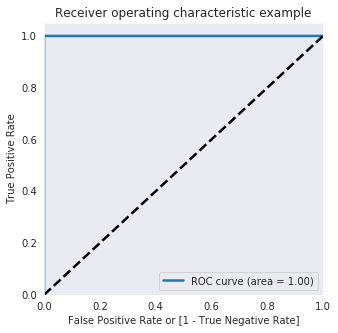

In [166]:
draw_roc(y_xgb_train_act_predprob_smt.Class, y_xgb_train_act_predprob_smt.Class_Prob)

In [167]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_xgb_train_act_predprob_smt[i]= y_xgb_train_act_predprob_smt.Class_Prob.map(lambda x: 1 if x > i else 0)
y_xgb_train_act_predprob_smt.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,6.030454e-07,1,0,0,0,0,0,0,0,0,0
1,0,7.182575e-06,1,0,0,0,0,0,0,0,0,0
2,0,2.508872e-05,1,0,0,0,0,0,0,0,0,0
3,0,1.784154e-06,1,0,0,0,0,0,0,0,0,0
4,0,4.118357e-06,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.019608  1.000000  0.000000  0.019608
0.1   0.1  0.999728  1.000000  0.999723  0.986340
0.2   0.2  0.999927  1.000000  0.999925  0.996277
0.3   0.3  0.999974  1.000000  0.999974  0.998683
0.4   0.4  0.999983  0.999780  0.999987  0.999341
0.5   0.5  0.999987  0.999560  0.999996  0.999780
0.6   0.6  0.999970  0.998681  0.999996  0.999780
0.7   0.7  0.999953  0.997802  0.999996  0.999780
0.8   0.8  0.999841  0.991866  1.000000  1.000000
0.9   0.9  0.999341  0.966366  1.000000  1.000000


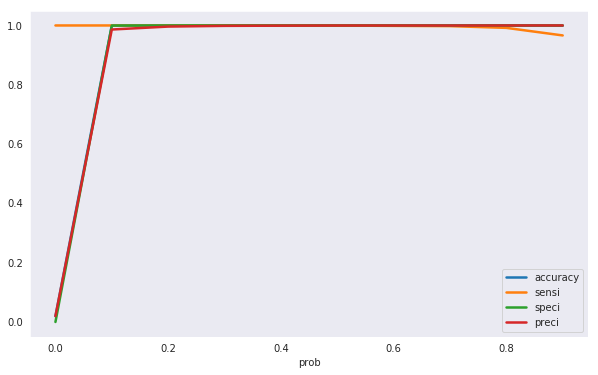

In [168]:
cutoff_table(y_xgb_train_act_predprob_smt)

In [169]:
y_xgb_train_act_predprob_smt['Class_final_predicted'] = y_xgb_train_act_predprob_smt.Class_Prob.map( lambda x: 1 if x > threshold_xgb_smt else 0)
y_xgb_train_act_predprob_smt.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
0,0,6.030454e-07,1,0,0,0,0,0,0,0,0,0,0
1,0,7.182575e-06,1,0,0,0,0,0,0,0,0,0,0
2,0,2.508872e-05,1,0,0,0,0,0,0,0,0,0,0
3,0,1.784154e-06,1,0,0,0,0,0,0,0,0,0,0
4,0,4.118357e-06,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - Training Data </font>

[[227447      4]
 [     1   4548]]


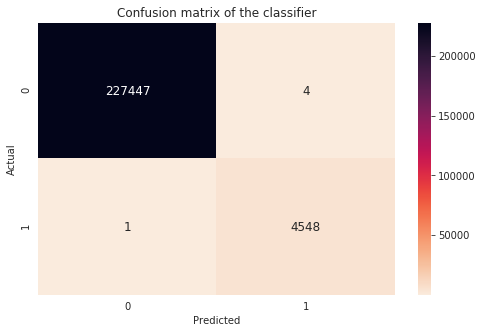

0.999978448275862
Sensitivity: 99.98 %
Specificity: 100.0 %
FPR: 0.0 %
FNR: 0.02 %
Positive Predictive Power: 99.91 %
Negative Predictive Power: 100.0 %
ACCURACY SCORE: 100.0 %
Precision Score of the Model: 99.91 %


In [170]:
train_recall_xgb_smt, train_preci_xgb_smt, train_f1_xgb_smt, train_speci_xgb_smt, train_roc_auc_xgb_smt = confusion_scores(y_xgb_train_act_predprob_smt)

In [171]:
y_xgb_test_predprob_smt = xgb_smt_classifier.predict_proba(X_test)[:,1]
y_xgb_test_act_predprob_smt = pd.DataFrame({'Class':y_test, 'Class_Prob':y_xgb_test_predprob_smt})

In [172]:
y_xgb_test_act_predprob_smt['Class_final_predicted'] = y_xgb_test_act_predprob_smt.Class_Prob.map( lambda x: 1 if x > threshold_xgb_smt else 0)
y_xgb_test_act_predprob_smt.head()

,Class,Class_Prob,Class_final_predicted
263020,0,4.089506e-07,0
11378,0,8.919436e-07,0
147283,0,2.554521e-05,0
219439,0,2.219837e-08,0
36939,0,1.124487e-04,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56841    23]
 [   13    85]]


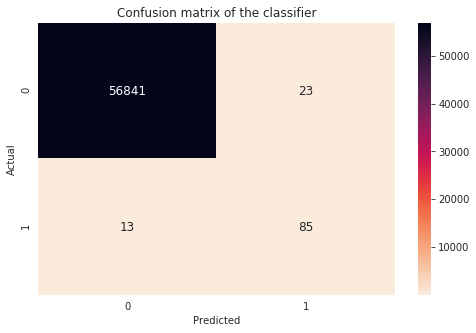

0.9993679997191109
Sensitivity: 86.73 %
Specificity: 99.96 %
FPR: 0.04 %
FNR: 13.27 %
Positive Predictive Power: 78.7 %
Negative Predictive Power: 99.98 %
ACCURACY SCORE: 99.94 %
Precision Score of the Model: 78.7 %


In [173]:
test_recall_xgb_smt, test_preci_xgb_smt, test_f1_xgb_smt, test_speci_xgb_smt, test_roc_auc_xgb_smt = confusion_scores(y_xgb_test_act_predprob_smt)

In [174]:
model_scores_df = model_scores_df.append({'clf' : 'xgboost', 'train_data' : 'smote' , 'train_recall' : train_recall_xgb_smt, 'train_preci' : train_preci_xgb_smt, 'train_f1' : train_f1_xgb_smt, 'train_speci' : train_speci_xgb_smt, 'train_roc_auc' : train_roc_auc_xgb_smt , 'test_recall' : test_recall_xgb_smt, 'test_preci' : test_preci_xgb_smt, 'test_f1' : test_f1_xgb_smt, 'test_speci' : test_speci_xgb_smt, 'test_roc_auc' : test_roc_auc_xgb_smt}, ignore_index=True)

In [175]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56
5,dec-tree,smote,86.77,91.96,89.29,99.85,99.80,86.73,44.27,58.62,99.81,94.84
6,ran-forest,smote,90.26,94.72,92.44,99.90,99.97,88.78,52.41,65.91,99.86,98.28
7,xgboost,smote,99.98,99.91,99.95,100.00,100.00,86.73,78.70,82.52,99.96,98.29


Top var = V14
2nd Top var = V17
3rd Top var = V10


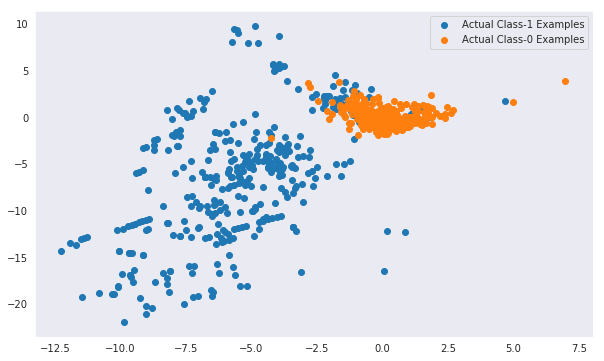

In [176]:
important_features(xgb_smt_classifier, X_train_smt)

## <font color = blue> PART-7: Build Classification models on ADASYN dataset </font>

## ADASYN

#### <font color = blue> We are performing only oversampling of minority class to be 2% as higher oversampling and balancing leads to overfitting, prediciting multip False Positives & very poor precision </font>

In [177]:
ada_oversampler = ADASYN(sampling_strategy=0.02, random_state=42)
X_train_ada,y_train_ada = ada_oversampler.fit_resample(X_train_new,y_train)

In [178]:
print(X_train_ada.shape)
print(y_train_ada.shape)
print(np.sum(y_train_ada))
print(np.sum(y_train))
print(np.sum(y_test))

(232042, 29)
(232042,)
4591
394
98


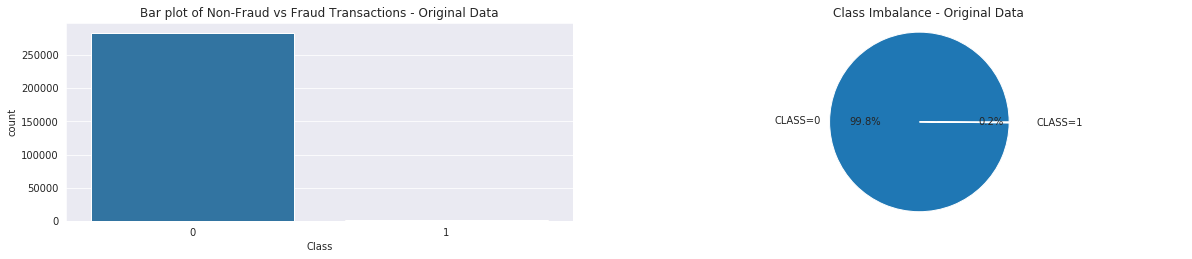

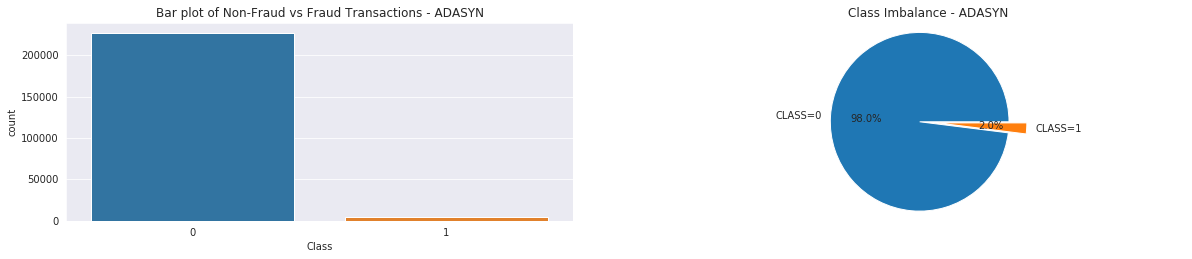

In [179]:
plot_imbalance(X_train_ada,y_train_ada,'ADASYN',df)

### a. Logistic Regression

In [180]:
# Logistic Regression

param_grid = {
    'C': [ 0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000 ],
    'penalty': ["l1","l2"],
    'solver' : ["saga"],
    'random_state' : [42],
    'n_jobs' : [-1]
}

num_C = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100, 1000 ]  #--> list of values
#cv_num =   5 
skf = StratifiedKFold(n_splits=5, random_state=42)
#--> list of values
lr=LogisticRegression()
grid_search_lr_ada = GridSearchCV(estimator = lr, param_grid = param_grid, cv=skf, scoring="roc_auc",
                                          n_jobs=-1,verbose=1)

In [181]:
lr_ada_classifier = LogisticRegression(C=0.001, fit_intercept=True,
                   intercept_scaling=1, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='saga', tol=0.0001, verbose=1)

In [182]:
lr_ada_classifier.fit(X_train_ada, y_train_ada)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 14 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.5s finished


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [183]:
y_lr_train_predprob_ada = lr_ada_classifier.predict_proba(X_train_ada)[:,1]

In [184]:
y_lr_train_act_predprob_ada = pd.DataFrame({'Class':y_train_ada, 'Class_Prob':y_lr_train_predprob_ada})
fpr, tpr, thresholds = metrics.roc_curve(y_lr_train_act_predprob_ada.Class, y_lr_train_act_predprob_ada.Class_Prob, drop_intermediate = False )

In [185]:
threshold_lr_ada = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_lr_ada)

Threshold:  0.01744685217714024


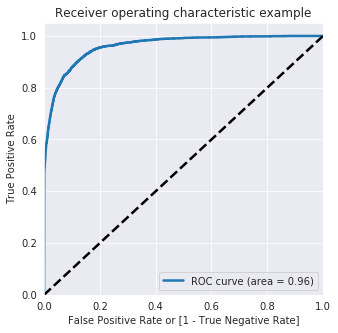

In [186]:
draw_roc(y_lr_train_act_predprob_ada.Class, y_lr_train_act_predprob_ada.Class_Prob)

In [187]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_lr_train_act_predprob_ada[i]= y_lr_train_act_predprob_ada.Class_Prob.map(lambda x: 1 if x > i else 0)
y_lr_train_act_predprob_ada.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002292,1,0,0,0,0,0,0,0,0,0
1,0,0.006140,1,0,0,0,0,0,0,0,0,0
2,0,0.001781,1,0,0,0,0,0,0,0,0,0
3,0,0.002916,1,0,0,0,0,0,0,0,0,0
4,0,0.001480,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.019785  1.000000  0.000000  0.019785
0.1   0.1  0.981594  0.601176  0.989272  0.530769
0.2   0.2  0.986244  0.546722  0.995115  0.693179
0.3   0.3  0.988308  0.498149  0.998202  0.848294
0.4   0.4  0.988911  0.482684  0.999129  0.917978
0.5   0.5  0.988649  0.455456  0.999411  0.939775
0.6   0.6  0.987959  0.413418  0.999556  0.949475
0.7   0.7  0.987610  0.390329  0.999666  0.959315
0.8   0.8  0.987067  0.360706  0.999710  0.961672
0.9   0.9  0.986084  0.309301  0.999745  0.960758


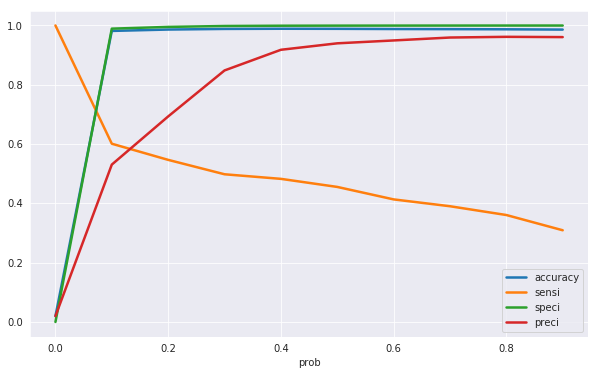

In [188]:
cutoff_table(y_lr_train_act_predprob_ada)

In [189]:
y_lr_train_act_predprob_ada['Class_final_predicted'] = y_lr_train_act_predprob_ada.Class_Prob.map( lambda x: 1 if x > 0.03 else 0)
y_lr_train_act_predprob_ada.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
0,0,0.002292,1,0,0,0,0,0,0,0,0,0,0
1,0,0.006140,1,0,0,0,0,0,0,0,0,0,0
2,0,0.001781,1,0,0,0,0,0,0,0,0,0,0
3,0,0.002916,1,0,0,0,0,0,0,0,0,0,0
4,0,0.001480,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - ADASYN Training Data </font>

[[215441  12010]
 [   888   3703]]


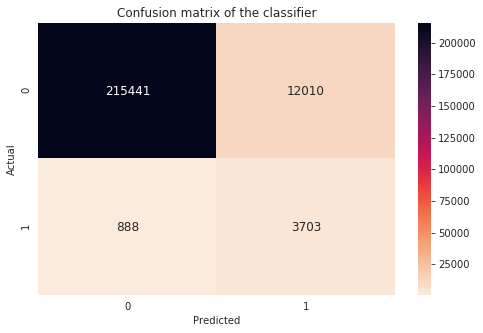

0.9444152351729428
Sensitivity: 80.66 %
Specificity: 94.72 %
FPR: 5.28 %
FNR: 19.34 %
Positive Predictive Power: 23.57 %
Negative Predictive Power: 99.59 %
ACCURACY SCORE: 94.44 %
Precision Score of the Model: 23.57 %


In [190]:
train_recall_lr_ada, train_preci_lr_ada, train_f1_lr_ada, train_speci_lr_ada, train_roc_auc_lr_ada = confusion_scores(y_lr_train_act_predprob_ada)

In [191]:
y_lr_test_predprob_ada = lr_ada_classifier.predict_proba(X_test)[:,1]
y_lr_test_act_predprob_ada = pd.DataFrame({'Class':y_test, 'Class_Prob':y_lr_test_predprob_ada})

In [192]:
y_lr_test_act_predprob_ada['Class_final_predicted'] = y_lr_test_act_predprob_ada.Class_Prob.map( lambda x: 1 if x > 0.03 else 0)
y_lr_test_act_predprob_ada.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.003538,0
11378,0,0.005317,0
147283,0,0.016463,0
219439,0,0.003006,0
36939,0,0.251237,1


#### <font color = blue> Confusion Matrix - Test Data </font>

[[53765  3099]
 [    8    90]]


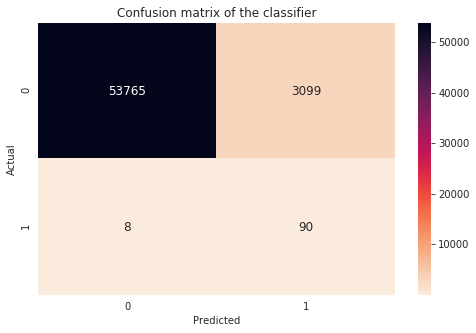

0.9454548646466066
Sensitivity: 91.84 %
Specificity: 94.55 %
FPR: 5.45 %
FNR: 8.16 %
Positive Predictive Power: 2.82 %
Negative Predictive Power: 99.99 %
ACCURACY SCORE: 94.55 %
Precision Score of the Model: 2.82 %


In [193]:
test_recall_lr_ada, test_preci_lr_ada, test_f1_lr_ada, test_speci_lr_ada, test_roc_auc_lr_ada = confusion_scores(y_lr_test_act_predprob_ada)

In [194]:
model_scores_df = model_scores_df.append({'clf' : 'log-reg', 'train_data' : 'adasyn' , 'train_recall' : train_recall_lr_ada, 'train_preci' : train_preci_lr_ada, 'train_f1' : train_f1_lr_ada, 'train_speci' : train_speci_lr_ada, 'train_roc_auc' : train_roc_auc_lr_ada , 'test_recall' : test_recall_lr_ada, 'test_preci' : test_preci_lr_ada, 'test_f1' : test_f1_lr_ada, 'test_speci' : test_speci_lr_ada, 'test_roc_auc' : test_roc_auc_lr_ada}, ignore_index=True)

In [195]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56
5,dec-tree,smote,86.77,91.96,89.29,99.85,99.80,86.73,44.27,58.62,99.81,94.84
6,ran-forest,smote,90.26,94.72,92.44,99.90,99.97,88.78,52.41,65.91,99.86,98.28
7,xgboost,smote,99.98,99.91,99.95,100.00,100.00,86.73,78.70,82.52,99.96,98.29
8,log-reg,adasyn,80.66,23.57,36.48,94.72,96.12,91.84,2.82,5.48,94.55,97.53


### b. Decision Tree Classifier

In [196]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 21, 5),
    'min_samples_leaf': range(50, 201, 50),
    'min_samples_split': range(50, 201, 50),
    'criterion': ["entropy", "gini"],
    'random_state' : [42]
}

skf = StratifiedKFold(n_splits=5, random_state=42)
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search_dt_ada = GridSearchCV(estimator = dtree, param_grid = param_grid,
                              scoring = 'roc_auc', cv = skf, verbose = 1, n_jobs=-1)


In [197]:
# Fit the grid search to the data
#grid_search_dt_ada.fit(X_train_ada,y_train_ada)

In [198]:
#print(grid_search_dt_ada.best_score_)
#print(grid_search_dt_ada.best_params_)
#print(grid_search_dt_ada.best_estimator_)

In [199]:
# cv results
#dt_ada_cv_results = pd.DataFrame(grid_search_dt_ada.cv_results_)
#dt_ada_cv_results

In [200]:
dt_ada_classifier = DecisionTreeClassifier(criterion='gini',
                       max_depth=15, min_samples_leaf=200, min_samples_split=50,
                       random_state=42, splitter='best')

In [201]:
dt_ada_classifier.fit(X_train_ada,y_train_ada)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [202]:
y_dt_train_predprob_ada = dt_ada_classifier.predict_proba(X_train_ada)[:,1]

In [203]:
y_dt_train_act_predprob_ada = pd.DataFrame({'Class':y_train_ada, 'Class_Prob':y_dt_train_predprob_ada})
fpr, tpr, thresholds = metrics.roc_curve(y_dt_train_act_predprob_ada.Class, y_dt_train_act_predprob_ada.Class_Prob, drop_intermediate = False )

In [204]:
threshold_dt_ada = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_dt_ada)

Threshold:  0.02


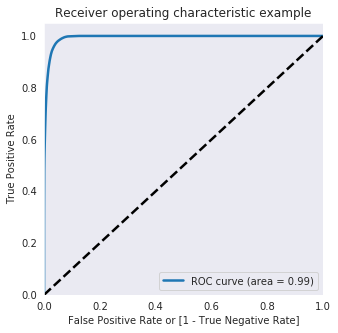

In [205]:
draw_roc(y_dt_train_act_predprob_ada.Class, y_dt_train_act_predprob_ada.Class_Prob)

In [206]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_dt_train_act_predprob_ada[i]= y_dt_train_act_predprob_ada.Class_Prob.map(lambda x: 1 if x > i else 0)
y_dt_train_act_predprob_ada.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.876858  1.000000  0.874373  0.138429
0.1   0.1  0.977913  0.908299  0.979319  0.469912
0.2   0.2  0.985464  0.824875  0.988705  0.595815
0.3   0.3  0.987502  0.768678  0.991919  0.657537
0.4   0.4  0.988709  0.703986  0.994456  0.719341
0.5   0.5  0.989541  0.547157  0.998470  0.878322
0.6   0.6  0.989489  0.524069  0.998883  0.904511
0.7   0.7  0.989088  0.478545  0.999393  0.940899
0.8   0.8  0.989088  0.478545  0.999393  0.940899
0.9   0.9  0.985929  0.290786  0.999960  0.993304


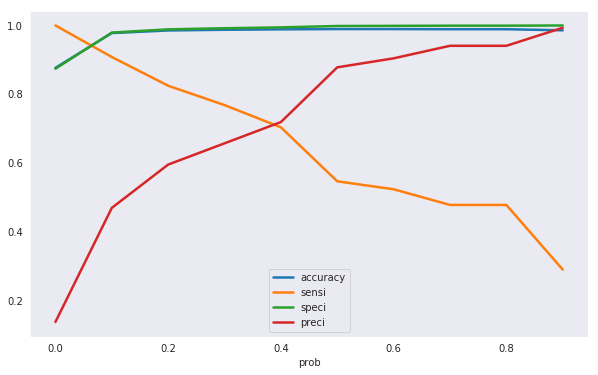

In [207]:
cutoff_table(y_dt_train_act_predprob_ada)

In [208]:
y_dt_train_act_predprob_ada['Class_final_predicted'] = y_dt_train_act_predprob_ada.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_dt_train_act_predprob_ada.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
0,0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - ADASYN Training Data </font>

[[222747   4704]
 [   421   4170]]


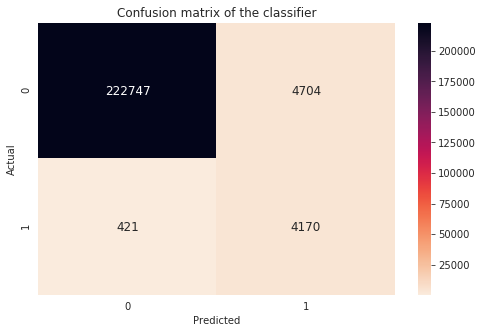

0.9779134811801312
Sensitivity: 90.83 %
Specificity: 97.93 %
FPR: 2.07 %
FNR: 9.17 %
Positive Predictive Power: 46.99 %
Negative Predictive Power: 99.81 %
ACCURACY SCORE: 97.79 %
Precision Score of the Model: 46.99 %


In [209]:
train_recall_dt_ada, train_preci_dt_ada, train_f1_dt_ada, train_speci_dt_ada, train_roc_auc_dt_ada = confusion_scores(y_dt_train_act_predprob_ada)

In [210]:
y_dt_test_predprob_ada = dt_ada_classifier.predict_proba(X_test)[:,1]
y_dt_test_act_predprob_ada = pd.DataFrame({'Class':y_test, 'Class_Prob':y_dt_test_predprob_ada})

In [211]:
y_dt_test_act_predprob_ada['Class_final_predicted'] = y_dt_test_act_predprob_ada.Class_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_dt_test_act_predprob_ada.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.000000,0
11378,0,0.000000,0
147283,0,0.004115,0
219439,0,0.000000,0
36939,0,0.000000,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[55629  1235]
 [   12    86]]


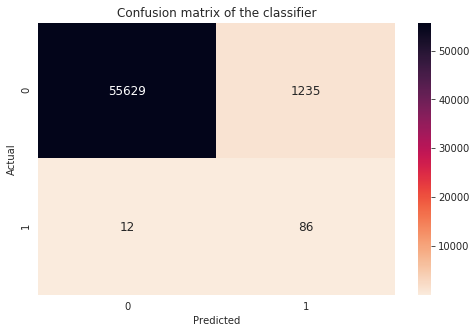

0.9781082124925389
Sensitivity: 87.76 %
Specificity: 97.83 %
FPR: 2.17 %
FNR: 12.24 %
Positive Predictive Power: 6.51 %
Negative Predictive Power: 99.98 %
ACCURACY SCORE: 97.81 %
Precision Score of the Model: 6.51 %


In [212]:
test_recall_dt_ada, test_preci_dt_ada, test_f1_dt_ada, test_speci_dt_ada, test_roc_auc_dt_ada = confusion_scores(y_dt_test_act_predprob_ada)

Top var = V14
2nd Top var = V10
3rd Top var = V17


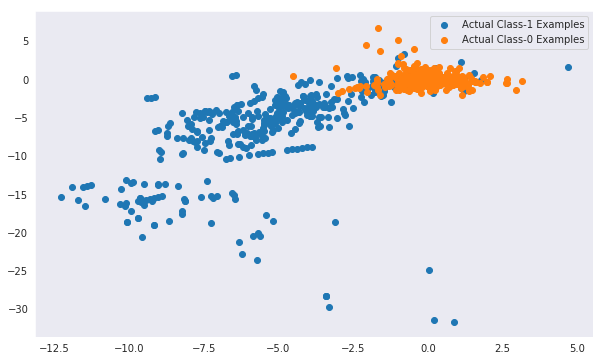

In [213]:
important_features(dt_ada_classifier, X_train_ada)

In [214]:
model_scores_df = model_scores_df.append({'clf' : 'dec-tree', 'train_data' : 'adasyn' , 'train_recall' : train_recall_dt_ada, 'train_preci' : train_preci_dt_ada, 'train_f1' : train_f1_dt_ada, 'train_speci' : train_speci_dt_ada, 'train_roc_auc' : train_roc_auc_dt_ada , 'test_recall' : test_recall_dt_ada, 'test_preci' : test_preci_dt_ada, 'test_f1' : test_f1_dt_ada, 'test_speci' : test_speci_dt_ada, 'test_roc_auc' : test_roc_auc_dt_ada}, ignore_index=True)

In [215]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56
5,dec-tree,smote,86.77,91.96,89.29,99.85,99.80,86.73,44.27,58.62,99.81,94.84
6,ran-forest,smote,90.26,94.72,92.44,99.90,99.97,88.78,52.41,65.91,99.86,98.28
7,xgboost,smote,99.98,99.91,99.95,100.00,100.00,86.73,78.70,82.52,99.96,98.29
8,log-reg,adasyn,80.66,23.57,36.48,94.72,96.12,91.84,2.82,5.48,94.55,97.53
9,dec-tree,adasyn,90.83,46.99,61.94,97.93,99.35,87.76,6.51,12.12,97.83,95.15


### c. Random Forest Classifier

In [216]:
# RandomForest Classifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 21, 5),
    'min_samples_leaf': range(50, 201, 50),
    'min_samples_split': range(50, 201, 50),
    'n_estimators': [100, 200, 300],
    'criterion': ["entropy", "gini"],
    'oob_score': [True, False],
    'n_jobs': [-1],
    'random_state' : [42]
}
skf = StratifiedKFold(n_splits=5, random_state=42)

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
random_search_rf_ada = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                                      scoring='roc_auc', cv=skf, verbose = 1, n_jobs = -1, random_state = 42)

In [217]:
rf_ada_classifier = RandomForestClassifier(bootstrap=True, 
                       criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=50, min_samples_split=150,
                       n_estimators=100, n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [218]:
rf_ada_classifier.fit(X_train_ada,y_train_ada)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1,
                       warm_start=False)

In [219]:
y_rf_train_predprob_ada = rf_ada_classifier.predict_proba(X_train_ada)[:,1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


In [220]:
y_rf_train_act_predprob_ada = pd.DataFrame({'Class':y_train_ada, 'Class_Prob':y_rf_train_predprob_ada})
fpr, tpr, thresholds = metrics.roc_curve(y_rf_train_act_predprob_ada.Class, y_rf_train_act_predprob_ada.Class_Prob, drop_intermediate = False )

In [221]:
threshold_rf_ada = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_rf_ada)

Threshold:  0.09758560420816757


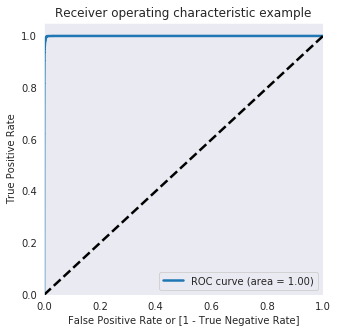

In [222]:
draw_roc(y_rf_train_act_predprob_ada.Class, y_rf_train_act_predprob_ada.Class_Prob)

In [223]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_rf_train_act_predprob_ada[i]= y_rf_train_act_predprob_ada.Class_Prob.map(lambda x: 1 if x > i else 0)
y_rf_train_act_predprob_ada.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.045910e-07,1,0,0,0,0,0,0,0,0,0
1,0,3.113325e-05,1,0,0,0,0,0,0,0,0,0
2,0,8.999370e-04,1,0,0,0,0,0,0,0,0,0
3,0,1.005036e-04,1,0,0,0,0,0,0,0,0,0
4,0,4.445646e-04,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.108498  1.000000  0.090503  0.021711
0.1   0.1  0.991226  0.997168  0.991106  0.693531
0.2   0.2  0.997005  0.956219  0.997828  0.898853
0.3   0.3  0.996651  0.881725  0.998971  0.945353
0.4   0.4  0.994777  0.769767  0.999319  0.957983
0.5   0.5  0.992885  0.662165  0.999560  0.968153
0.6   0.6  0.990903  0.555870  0.999683  0.972561
0.7   0.7  0.989713  0.490089  0.999798  0.979965
0.8   0.8  0.988368  0.418863  0.999864  0.984135
0.9   0.9  0.985356  0.261381  0.999969  0.994200


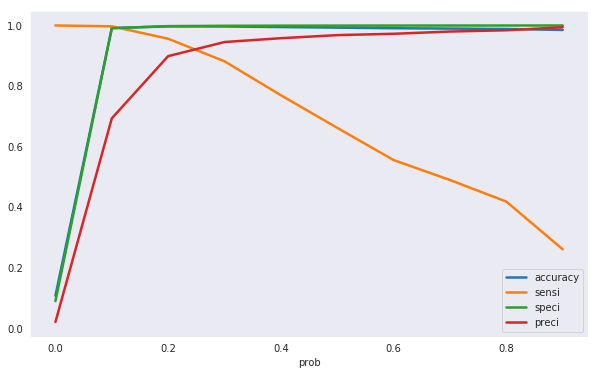

In [224]:
cutoff_table(y_rf_train_act_predprob_ada)

In [225]:
y_rf_train_act_predprob_ada['Class_final_predicted'] = y_rf_train_act_predprob_ada.Class_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_rf_train_act_predprob_ada.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
0,0,2.045910e-07,1,0,0,0,0,0,0,0,0,0,0
1,0,3.113325e-05,1,0,0,0,0,0,0,0,0,0,0
2,0,8.999370e-04,1,0,0,0,0,0,0,0,0,0,0
3,0,1.005036e-04,1,0,0,0,0,0,0,0,0,0,0
4,0,4.445646e-04,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - ADASYN Training Data </font>

[[227129    322]
 [   334   4257]]


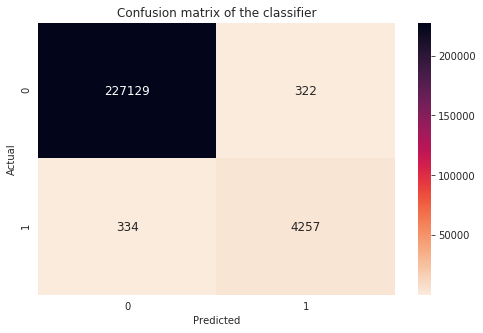

0.9971729255910567
Sensitivity: 92.72 %
Specificity: 99.86 %
FPR: 0.14 %
FNR: 7.28 %
Positive Predictive Power: 92.97 %
Negative Predictive Power: 99.85 %
ACCURACY SCORE: 99.72 %
Precision Score of the Model: 92.97 %


In [226]:
train_recall_rf_ada, train_preci_rf_ada, train_f1_rf_ada, train_speci_rf_ada, train_roc_auc_rf_ada = confusion_scores(y_rf_train_act_predprob_ada)

In [227]:
y_rf_test_predprob_ada = rf_ada_classifier.predict_proba(X_test)[:,1]
y_rf_test_act_predprob_ada = pd.DataFrame({'Class':y_test, 'Class_Prob':y_rf_test_predprob_ada})

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [228]:
y_rf_test_act_predprob_ada['Class_final_predicted'] = y_rf_test_act_predprob_ada.Class_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_rf_test_act_predprob_ada.head()

,Class,Class_Prob,Class_final_predicted
263020,0,0.000105,0
11378,0,0.000005,0
147283,0,0.109510,0
219439,0,0.000003,0
36939,0,0.105388,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56760   104]
 [   11    87]]


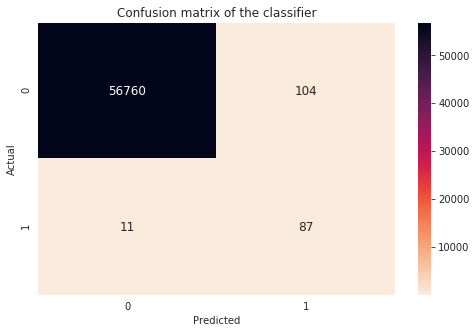

0.9979811102138267
Sensitivity: 88.78 %
Specificity: 99.82 %
FPR: 0.18 %
FNR: 11.22 %
Positive Predictive Power: 45.55 %
Negative Predictive Power: 99.98 %
ACCURACY SCORE: 99.8 %
Precision Score of the Model: 45.55 %


In [229]:
test_recall_rf_ada, test_preci_rf_ada, test_f1_rf_ada, test_speci_rf_ada, test_roc_auc_rf_ada = confusion_scores(y_rf_test_act_predprob_ada)

Top var = V14
2nd Top var = V4
3rd Top var = V17


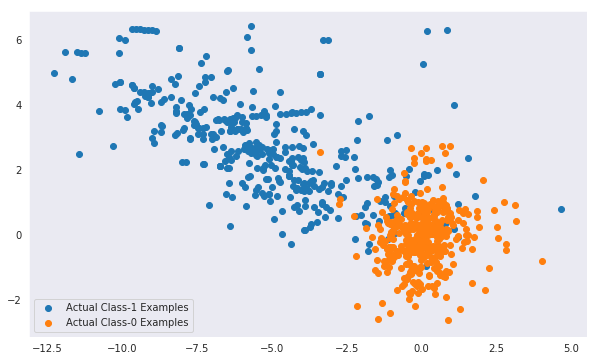

In [230]:
important_features(rf_ada_classifier, X_train_ada)

In [231]:
model_scores_df = model_scores_df.append({'clf' : 'ran-forest', 'train_data' : 'adasyn' , 'train_recall' : train_recall_rf_ada, 'train_preci' : train_preci_rf_ada, 'train_f1' : train_f1_rf_ada, 'train_speci' : train_speci_rf_ada, 'train_roc_auc' : train_roc_auc_rf_ada , 'test_recall' : test_recall_rf_ada, 'test_preci' : test_preci_rf_ada, 'test_f1' : test_f1_rf_ada, 'test_speci' : test_speci_rf_ada, 'test_roc_auc' : test_roc_auc_rf_ada}, ignore_index=True)

In [232]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56
5,dec-tree,smote,86.77,91.96,89.29,99.85,99.80,86.73,44.27,58.62,99.81,94.84
6,ran-forest,smote,90.26,94.72,92.44,99.90,99.97,88.78,52.41,65.91,99.86,98.28
7,xgboost,smote,99.98,99.91,99.95,100.00,100.00,86.73,78.70,82.52,99.96,98.29
8,log-reg,adasyn,80.66,23.57,36.48,94.72,96.12,91.84,2.82,5.48,94.55,97.53
9,dec-tree,adasyn,90.83,46.99,61.94,97.93,99.35,87.76,6.51,12.12,97.83,95.15


### d. XGBoost Classifier

In [233]:
# hyperparameter tuning with XGBoost

# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 21, 5),
    'learning_rate': [0.2, 0.6], 
    'min_child_weight': [1, 3, 5 ],
    'subsample': [0.3, 0.6, 0.9],
    'n_estimators': [100, 200, 300],
    'gamma' : [0.1, 0.3, 0.5],
    'reg_lambda' : [0, 0.2, 0.4],
    'reg_alpha': [0, 0.5, 1],
    'n_jobs': [-1],
    'random_state' : [42],
    'verbosity' : [1],
    'booster' : ["gbtree"],
    'gpu_id' : [0],
    'tree_method' : ['gpu_hist']
}

# creating a KFold object 
skf = StratifiedKFold(n_splits=5, random_state=42)

# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
random_search_ada_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, n_iter = 20,
                                      scoring='roc_auc', cv=skf, verbose = 1, n_jobs = -1, random_state = 42)

In [234]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

xgb_ada_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', 
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=5, 
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=0.4, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', verbosity=1)

In [235]:
# fit model on training data
xgb_ada_classifier.fit(X_train_ada,y_train_ada)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=0,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=0.4, scale_pos_weight=1, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=False, verbosity=1)

In [236]:
y_xgb_train_predprob_ada = xgb_ada_classifier.predict_proba(X_train_ada)[:,1]

In [237]:
y_xgb_train_act_predprob_ada = pd.DataFrame({'Class':y_train_ada, 'Class_Prob':y_xgb_train_predprob_ada})
fpr, tpr, thresholds = metrics.roc_curve(y_xgb_train_act_predprob_ada.Class, y_xgb_train_act_predprob_ada.Class_Prob, drop_intermediate = False )

In [238]:
threshold_xgb_ada = thresholds[np.argmax(tpr-fpr)]
print("Threshold: ",threshold_xgb_ada)

Threshold:  0.70245147


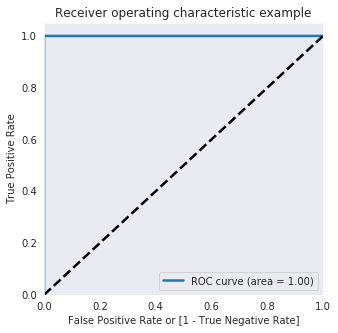

In [239]:
draw_roc(y_xgb_train_act_predprob_ada.Class, y_xgb_train_act_predprob_ada.Class_Prob)

In [240]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_xgb_train_act_predprob_ada[i]= y_xgb_train_act_predprob_ada.Class_Prob.map(lambda x: 1 if x > i else 0)
y_xgb_train_act_predprob_ada.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.181757e-07,1,0,0,0,0,0,0,0,0,0
1,0,1.971772e-06,1,0,0,0,0,0,0,0,0,0
2,0,1.118118e-05,1,0,0,0,0,0,0,0,0,0
3,0,1.234540e-06,1,0,0,0,0,0,0,0,0,0
4,0,5.350812e-06,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci     preci
0.0   0.0  0.019785  1.000000  0.000000  0.019785
0.1   0.1  0.999884  1.000000  0.999881  0.994153
0.2   0.2  0.999978  1.000000  0.999978  0.998912
0.3   0.3  0.999991  1.000000  0.999991  0.999565
0.4   0.4  0.999996  1.000000  0.999996  0.999782
0.5   0.5  1.000000  1.000000  1.000000  1.000000
0.6   0.6  1.000000  1.000000  1.000000  1.000000
0.7   0.7  1.000000  1.000000  1.000000  1.000000
0.8   0.8  0.999991  0.999564  1.000000  1.000000
0.9   0.9  0.999961  0.998040  1.000000  1.000000


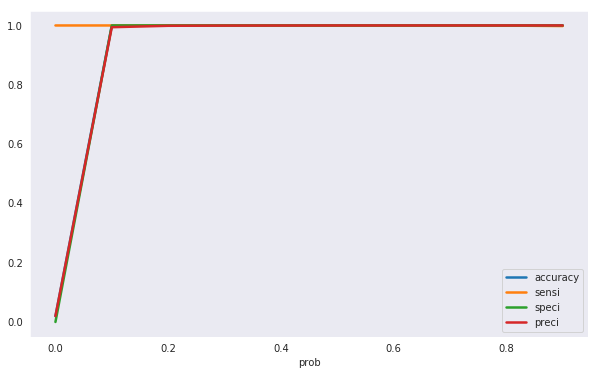

In [241]:
cutoff_table(y_xgb_train_act_predprob_ada)

In [242]:
y_xgb_train_act_predprob_ada['Class_final_predicted'] = y_xgb_train_act_predprob_ada.Class_Prob.map( lambda x: 1 if x > threshold_xgb_ada else 0)
y_xgb_train_act_predprob_ada.head()

,Class,Class_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Class_final_predicted
0,0,2.181757e-07,1,0,0,0,0,0,0,0,0,0,0
1,0,1.971772e-06,1,0,0,0,0,0,0,0,0,0,0
2,0,1.118118e-05,1,0,0,0,0,0,0,0,0,0,0
3,0,1.234540e-06,1,0,0,0,0,0,0,0,0,0,0
4,0,5.350812e-06,1,0,0,0,0,0,0,0,0,0,0


#### <font color = blue> Confusion Matrix - ADASYN Training Data </font>

[[227451      0]
 [     1   4590]]


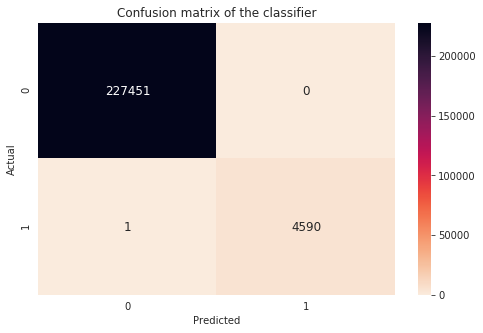

0.9999956904353522
Sensitivity: 99.98 %
Specificity: 100.0 %
FPR: 0.0 %
FNR: 0.02 %
Positive Predictive Power: 100.0 %
Negative Predictive Power: 100.0 %
ACCURACY SCORE: 100.0 %
Precision Score of the Model: 100.0 %


In [243]:
train_recall_xgb_ada, train_preci_xgb_ada, train_f1_xgb_ada, train_speci_xgb_ada, train_roc_auc_xgb_ada = confusion_scores(y_xgb_train_act_predprob_ada)

In [244]:
y_xgb_test_predprob_ada = xgb_ada_classifier.predict_proba(X_test)[:,1]
y_xgb_test_act_predprob_ada = pd.DataFrame({'Class':y_test, 'Class_Prob':y_xgb_test_predprob_ada})

In [245]:
y_xgb_test_act_predprob_ada['Class_final_predicted'] = y_xgb_test_act_predprob_ada.Class_Prob.map( lambda x: 1 if x > threshold_xgb_ada else 0)
y_xgb_test_act_predprob_ada.head()

,Class,Class_Prob,Class_final_predicted
263020,0,4.518855e-07,0
11378,0,5.164860e-07,0
147283,0,4.223561e-05,0
219439,0,6.595380e-08,0
36939,0,1.406049e-05,0


#### <font color = blue> Confusion Matrix - Test Data </font>

[[56856     8]
 [   16    82]]


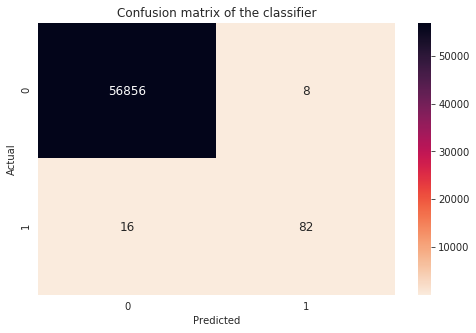

0.9995786664794073
Sensitivity: 83.67 %
Specificity: 99.99 %
FPR: 0.01 %
FNR: 16.33 %
Positive Predictive Power: 91.11 %
Negative Predictive Power: 99.97 %
ACCURACY SCORE: 99.96 %
Precision Score of the Model: 91.11 %


In [246]:
test_recall_xgb_ada, test_preci_xgb_ada, test_f1_xgb_ada, test_speci_xgb_ada, test_roc_auc_xgb_ada = confusion_scores(y_xgb_test_act_predprob_ada)

Top var = V14
2nd Top var = V10
3rd Top var = V4


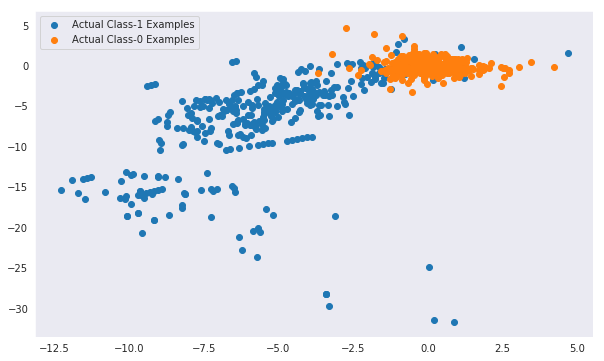

In [247]:
important_features(xgb_ada_classifier, X_train_ada)

In [248]:
model_scores_df = model_scores_df.append({'clf' : 'xgboost', 'train_data' : 'adasyn' , 'train_recall' : train_recall_xgb_ada, 'train_preci' : train_preci_xgb_ada, 'train_f1' : train_f1_xgb_ada, 'train_speci' : train_speci_xgb_ada, 'train_roc_auc' : train_roc_auc_xgb_ada , 'test_recall' : test_recall_xgb_ada, 'test_preci' : test_preci_xgb_ada, 'test_f1' : test_f1_xgb_ada, 'test_speci' : test_speci_xgb_ada, 'test_roc_auc' : test_roc_auc_xgb_ada}, ignore_index=True)

In [249]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56
5,dec-tree,smote,86.77,91.96,89.29,99.85,99.80,86.73,44.27,58.62,99.81,94.84
6,ran-forest,smote,90.26,94.72,92.44,99.90,99.97,88.78,52.41,65.91,99.86,98.28
7,xgboost,smote,99.98,99.91,99.95,100.00,100.00,86.73,78.70,82.52,99.96,98.29
8,log-reg,adasyn,80.66,23.57,36.48,94.72,96.12,91.84,2.82,5.48,94.55,97.53
9,dec-tree,adasyn,90.83,46.99,61.94,97.93,99.35,87.76,6.51,12.12,97.83,95.15


## <font color = blue> PART-7: Build KNN Classification models on Random Undersampled & Oversampled dataset </font>

## Random Oversampling & Undersampling combined

#### <font color = blue> Here, we will undersample the majority class training data to 50%, and then oversample the minority class to 2% of the new data volume. We will use this data to build and train KNeighbourclassifier (KNN) model. </font>

In [250]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.01)
# fit and apply the transform
X_temp, y_temp = over.fit_resample(X_train_new, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.02)
# fit and apply the transform
X_rous, y_rous = under.fit_resample(X_temp, y_temp)
print(X_rous.shape)
print(y_rous.shape)

(115974, 29)
(115974,)


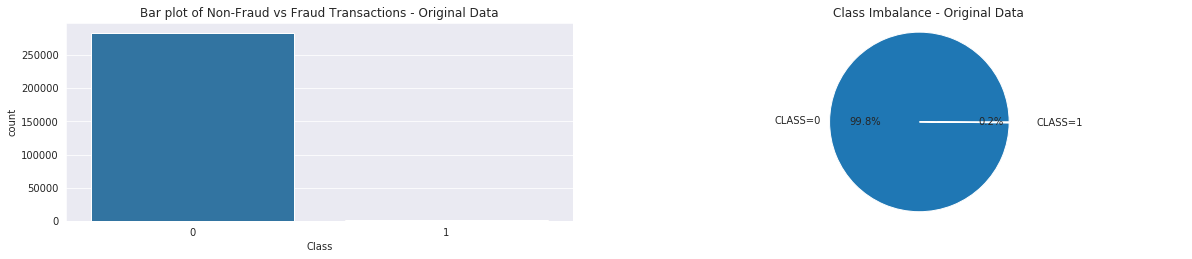

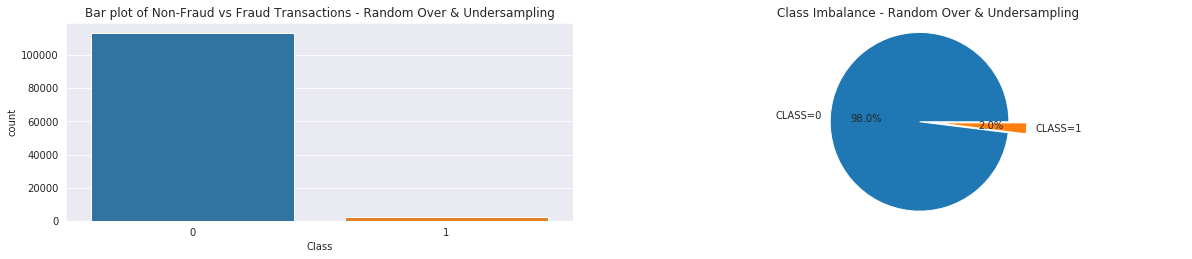

In [251]:
plot_imbalance(X_rous,y_rous,'Random Over & Undersampling',df)

In [252]:
print(X_rous.shape)
print(y_rous.shape)
print(np.sum(y_rous))
print(np.sum(y_train))
print(np.sum(y_test))

(115974, 29)
(115974,)
2274
394
98


## KNN

In [253]:
#Hyper Parameters Set
knn_model = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, random_state=42)
knn_params = {'n_neighbors':list(range(5,31,2)),
              'weights':['uniform', 'distance'],
              'n_jobs':[-1]}
random_search_rous_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_params, cv=skf, scoring='roc_auc', 
                                n_iter=10, random_state=42, n_jobs=-1,verbose=1)

In [254]:
knn_rous_classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='distance')

In [255]:
knn_rous_classifier.fit(X_rous, y_rous)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='distance')

In [256]:
y_knn_train_predprob_rous_1 = knn_rous_classifier.predict(X_rous)

In [257]:
y_knn_train_act_predprob_rous_1 = pd.DataFrame({'Class':y_rous, 'Class_final_predicted':y_knn_train_predprob_rous_1})

In [258]:
y_knn_train_act_predprob_rous_1.head()

,Class,Class_final_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


#### <font color = blue> Confusion Matrix - Random Over & Under sampled Training data : KNN Model </font>

[[113700      0]
 [     0   2274]]


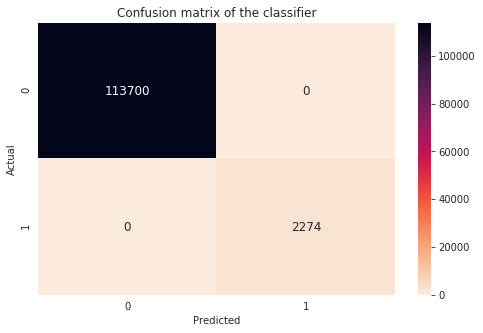

1.0
Sensitivity: 100.0 %
Specificity: 100.0 %
FPR: 0.0 %
FNR: 0.0 %
Positive Predictive Power: 100.0 %
Negative Predictive Power: 100.0 %
ACCURACY SCORE: 100.0 %
Precision Score of the Model: 100.0 %


In [259]:
train_recall_1, train_preci_1, train_f1_1, train_speci_1 = confusion_scores_final(y_knn_train_act_predprob_rous_1)

In [260]:
y_knn_test_predprob_rous_1 = knn_rous_classifier.predict(X_test)
y_knn_test_act_predprob_rous_1 = pd.DataFrame({'Class':y_test, 'Class_final_predicted':y_knn_test_predprob_rous_1})

In [261]:
y_knn_test_act_predprob_rous_1.head()

,Class,Class_final_predicted
263020,0,0
11378,0,0
147283,0,0
219439,0,0
36939,0,0


#### <font color = blue> Confusion Matrix - Test data : KNN Model </font>

[[56818    46]
 [   12    86]]


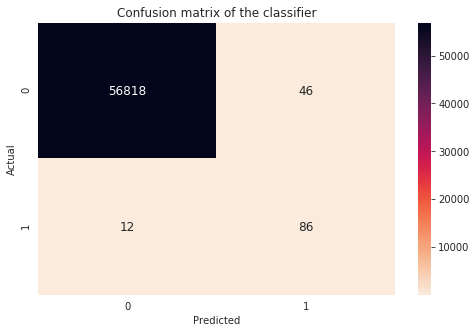

0.9989817773252344
Sensitivity: 87.76 %
Specificity: 99.92 %
FPR: 0.08 %
FNR: 12.24 %
Positive Predictive Power: 65.15 %
Negative Predictive Power: 99.98 %
ACCURACY SCORE: 99.9 %
Precision Score of the Model: 65.15 %


In [262]:
test_recall_1, test_preci_1, test_f1_1, test_speci_1 = confusion_scores_final(y_knn_test_act_predprob_rous_1)

In [263]:
model_scores_df = model_scores_df.append({'clf' : 'knn', 'train_data' : 'random_ou' , 'train_recall' : train_recall_1, 'train_preci' : train_preci_1, 'train_f1' : train_f1_1, 'train_speci' : train_speci_1, 'train_roc_auc' : 0 , 'test_recall' : test_recall_1, 'test_preci' : test_preci_1, 'test_f1' : test_f1_1, 'test_speci' : test_speci_1, 'test_roc_auc' : 0}, ignore_index=True)

## <font color = blue> PART-8: Analysis & Conclusion of all the Clasification Models </font>

In [264]:
model_scores_df

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
1,dec-tree,imbalanced,82.99,56.77,67.42,99.89,98.42,85.71,50.30,63.40,99.85,96.76
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
3,xgboost,imbalanced,99.75,99.24,99.49,100.00,100.00,82.65,88.04,85.26,99.98,97.58
4,log-reg,smote,86.59,81.60,84.02,99.61,98.66,88.78,26.05,40.28,99.57,97.56
5,dec-tree,smote,86.77,91.96,89.29,99.85,99.80,86.73,44.27,58.62,99.81,94.84
6,ran-forest,smote,90.26,94.72,92.44,99.90,99.97,88.78,52.41,65.91,99.86,98.28
7,xgboost,smote,99.98,99.91,99.95,100.00,100.00,86.73,78.70,82.52,99.96,98.29
8,log-reg,adasyn,80.66,23.57,36.48,94.72,96.12,91.84,2.82,5.48,94.55,97.53
9,dec-tree,adasyn,90.83,46.99,61.94,97.93,99.35,87.76,6.51,12.12,97.83,95.15


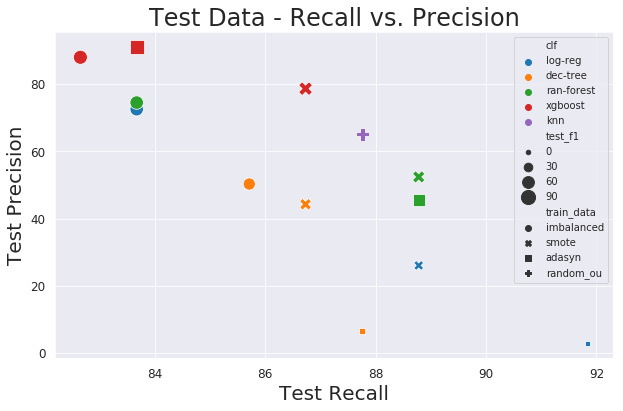

In [265]:
sns.set_style("darkgrid")
sns.scatterplot( x="test_recall", y = "test_preci", data=model_scores_df, hue= "clf" , style = "train_data",size="test_f1",
               sizes=(20, 200),legend = "brief")
plt.legend(loc='upper right')
plt.tick_params(labelsize=12, pad=6)
plt.xlabel('Test Recall', fontsize=20)
plt.ylabel('Test Precision', fontsize=20)
plt.title('Test Data - Recall vs. Precision', fontsize=24)
plt.show()

## <font color=blue> Of all the tested models (total 13 given above), the below 5 models have given the best Test Data recall / sensitivity (all above 83%), F1-score (65% and above) & overall accuracy (all above 99%). </font>

In [267]:
model_scores_df[(np.abs(model_scores_df.train_recall - model_scores_df.test_recall) <= 15) & (model_scores_df.test_f1 >= 65) & (model_scores_df.test_preci 	>= 50)]

,clf,train_data,train_recall,train_preci,train_f1,train_speci,train_roc_auc,test_recall,test_preci,test_f1,test_speci,test_roc_auc
0,log-reg,imbalanced,80.46,82.12,81.28,99.97,98.42,83.67,72.57,77.73,99.95,97.71
2,ran-forest,imbalanced,80.46,80.05,80.25,99.97,99.83,83.67,74.55,78.85,99.95,97.33
6,ran-forest,smote,90.26,94.72,92.44,99.90,99.97,88.78,52.41,65.91,99.86,98.28
7,xgboost,smote,99.98,99.91,99.95,100.00,100.00,86.73,78.70,82.52,99.96,98.29
12,knn,random_ou,100.00,100.00,100.00,100.00,0.00,87.76,65.15,74.78,99.92,0.00


### <font color = blue> - KNN Model on Random Over-sampled & under-sample data: Keeping in view the complexity involved & time-taken with KNN model, and also possible overfitting it has shown, it cannot be considered as preferred model. </font>

### <font color = blue> - Even the XGBoost model trained on SMOTE over-sample data has also shown over-fitting. On training data, it has 100% recall where as on test data it has shown 87.76% recall, a fall of 12.24%. A clear sign of high variance & overfitted data. </font>

### <font color = blue> - The Logistic Regression & Random Forest models trained on the original imbalanced dataset have given very good generalized models with 80.46% training recall and 83.67% test recall values. The F1-score is around 78% which means very high precision as well. These are very good all round models without any over-fitting and less complexity. </font>

### <font color = blue> - Random Forest model trained on SMOTE oversampled data is the BEST model of the lot keeping in view the overall Recall - It has 90.26% Training recall and 88.78% Test recall - Excellent generalized model without any over-fiiting.  The test F1-score score is 65.91%, which is slightly lower but keeping in view the low cost associated in dealing with False Positives, we can be content with this.</font>

## <font color = True> Cost Benefit Analysis has been skipped as we have been informed by mentors that it will NOT be scored. </font>